# House Price Prediction

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the file

In [2]:
path1 = "C:/Users/DEEPTI CHAUDHARI/Downloads/ETL HIVE CLASSES/Python/Project/House Pricing Project/training_set.csv"

In [3]:
import pandas as pd

df1 = pd.read_csv(path1)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Check missing values

In [5]:
s = df1.isna().sum()
s

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Drop statistically insignificant columns

In [7]:
df1 = df1.drop(labels = ['Id'], axis = 1)

### cat con separation

In [8]:
from func import catconsep
cat1, con1 = catconsep(df1)

In [9]:
cat1

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
con1

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Describe Data

In [11]:
df1[con1].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [12]:
df1[cat1].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [13]:
df1['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### Performing Univariate Analysis

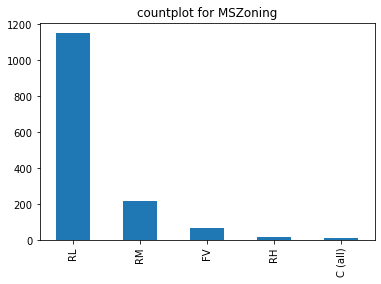

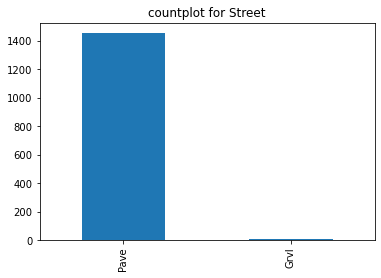

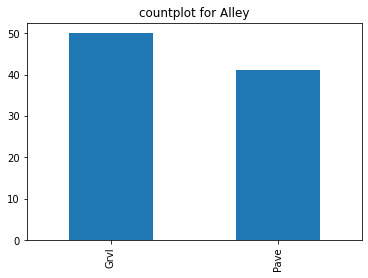

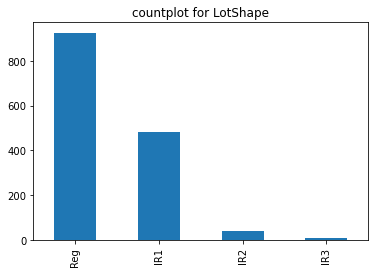

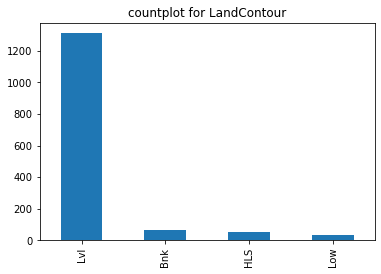

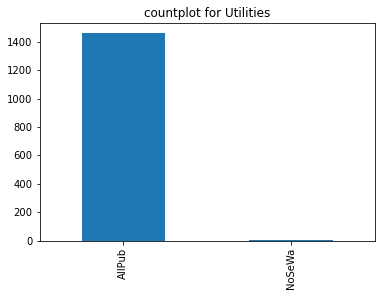

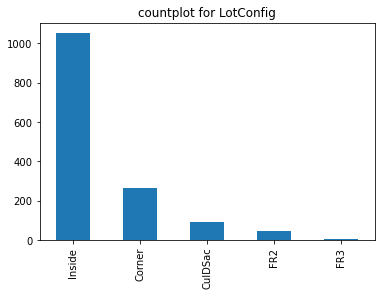

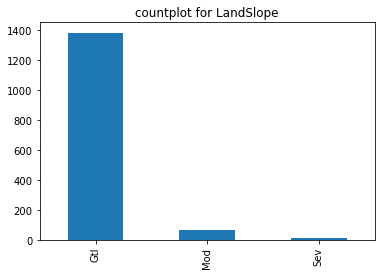

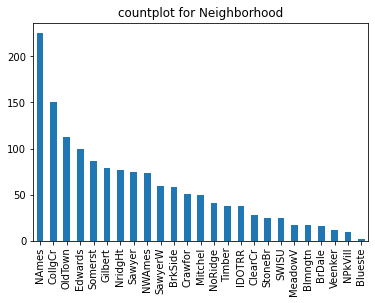

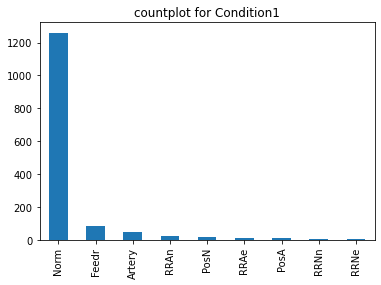

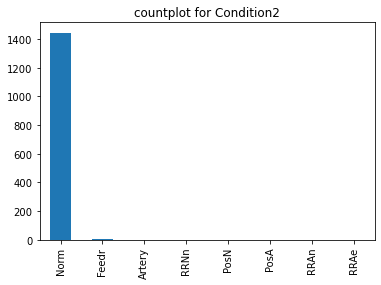

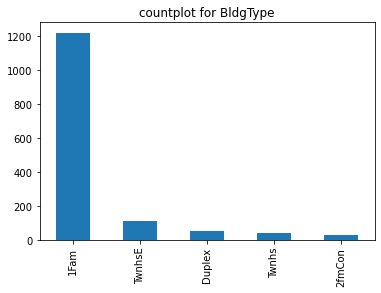

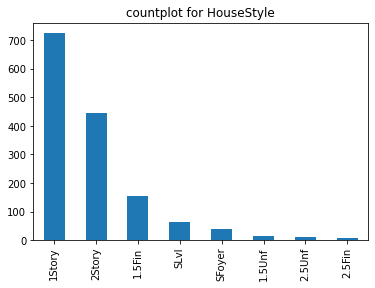

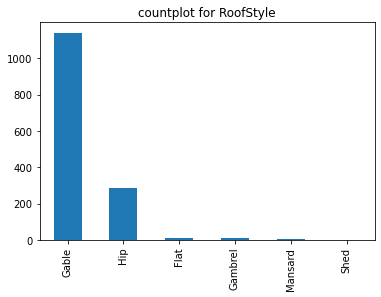

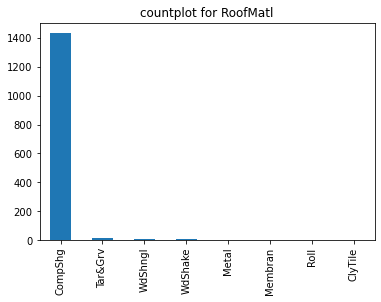

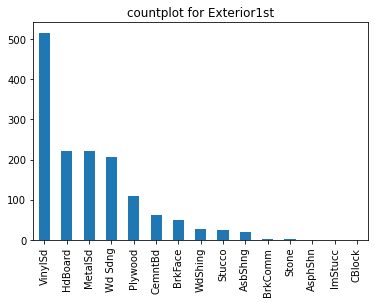

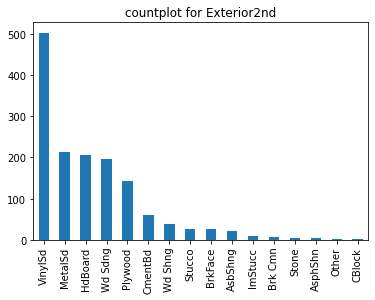

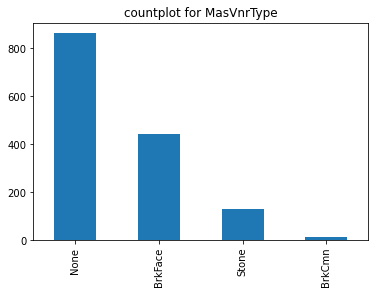

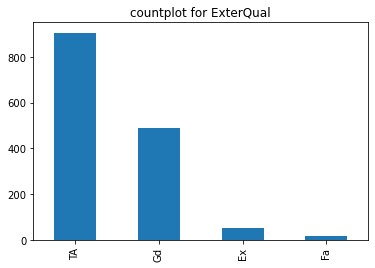

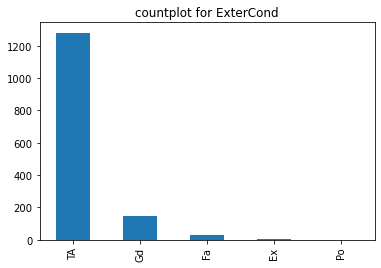

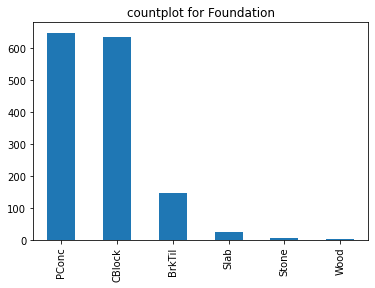

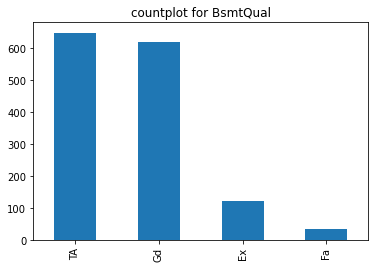

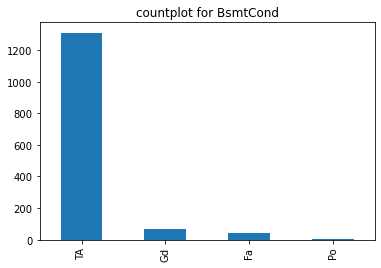

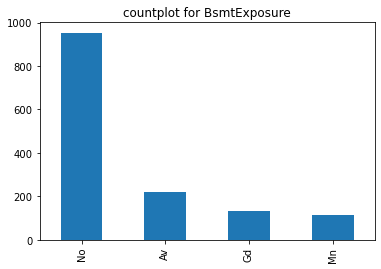

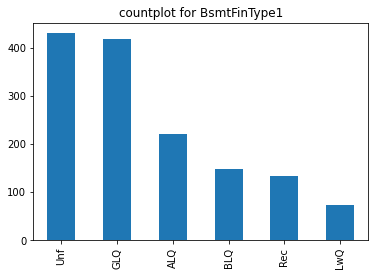

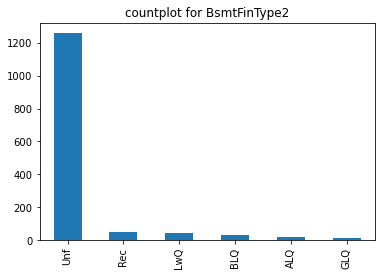

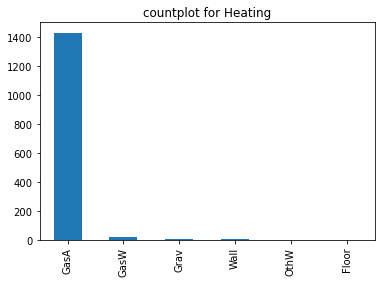

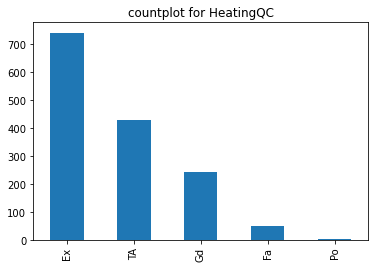

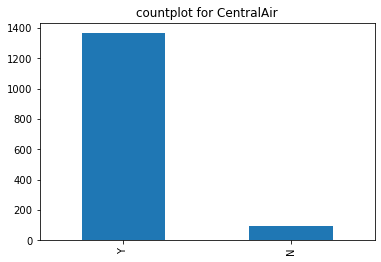

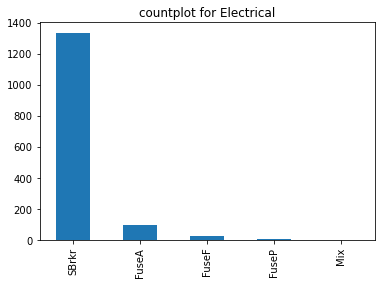

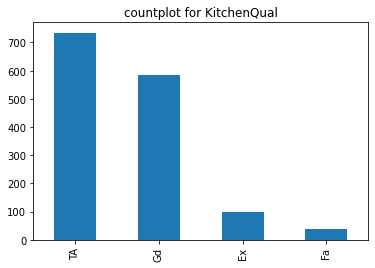

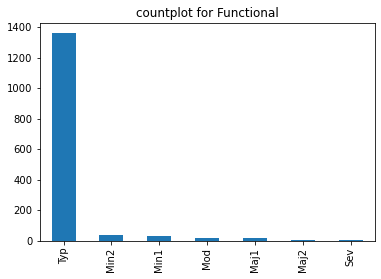

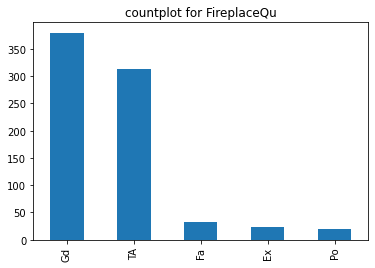

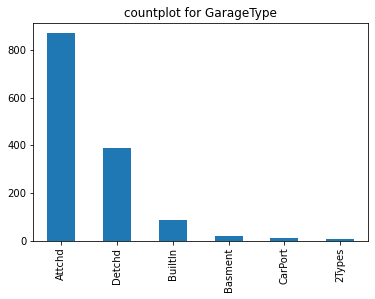

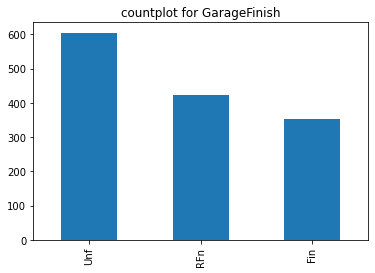

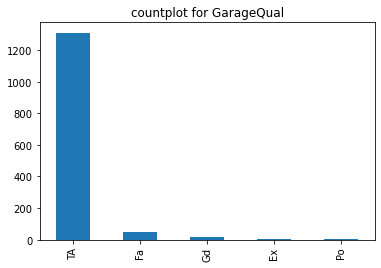

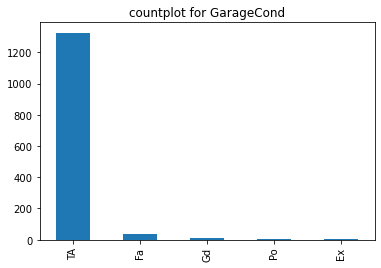

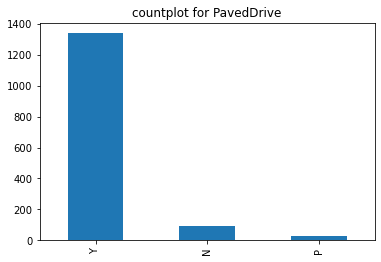

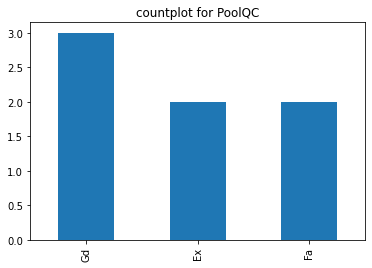

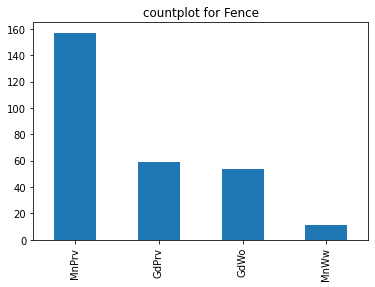

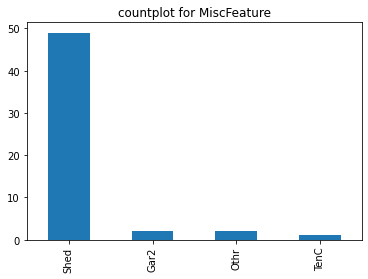

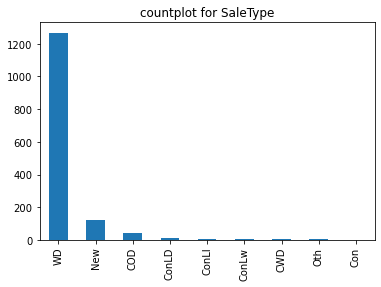

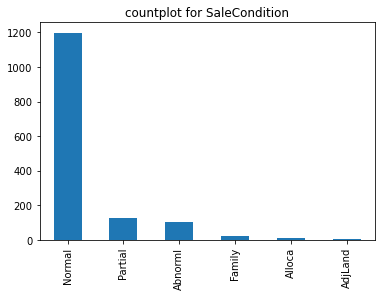

In [14]:
import matplotlib.pyplot as plt
for i in cat1:
    df1[i].value_counts().plot(kind = 'bar', title = f'countplot for {i}')
    plt.show()

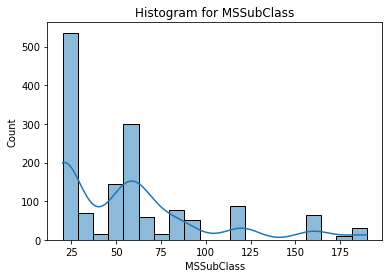

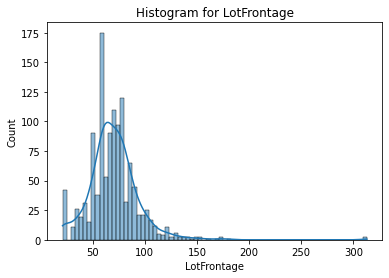

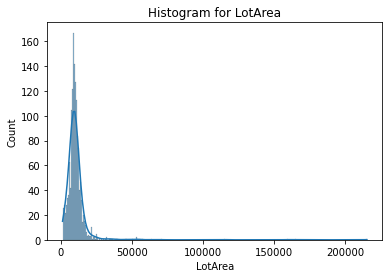

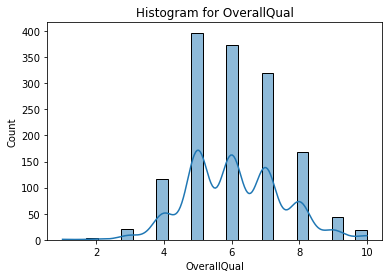

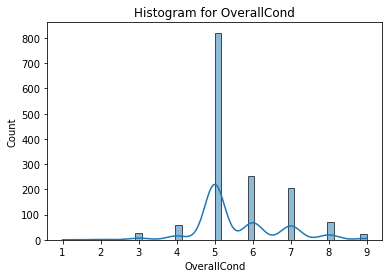

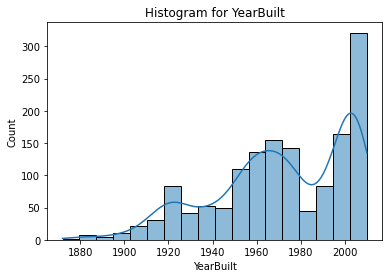

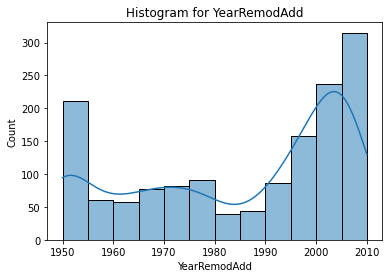

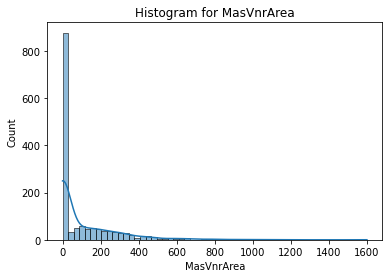

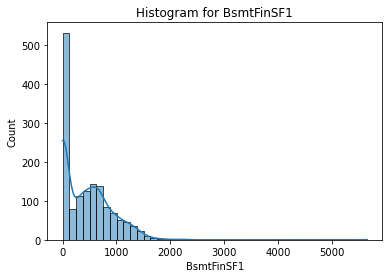

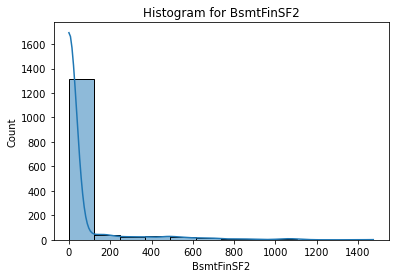

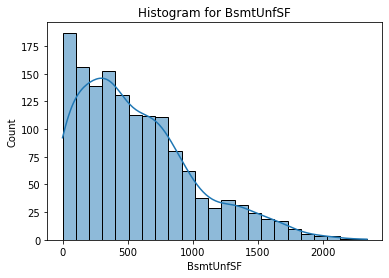

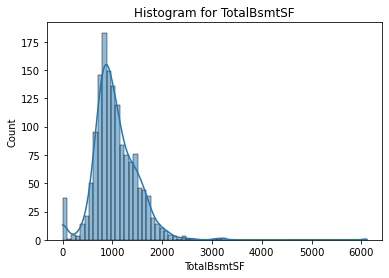

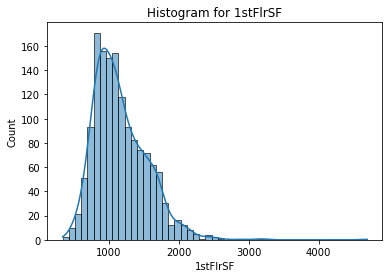

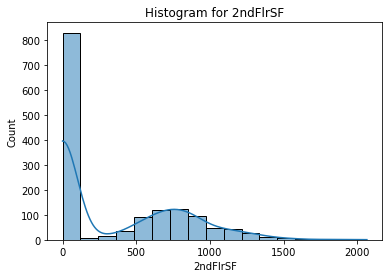

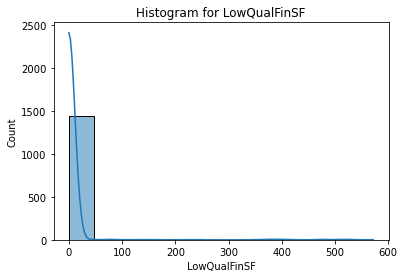

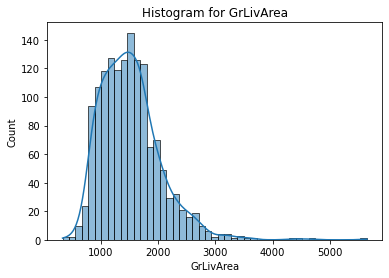

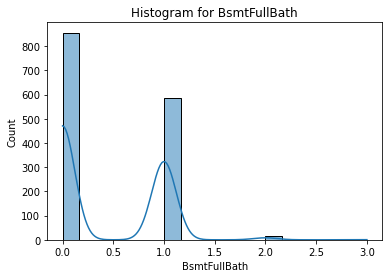

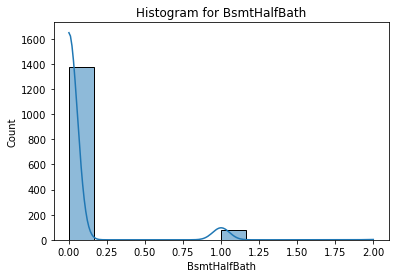

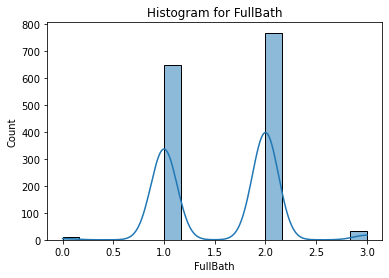

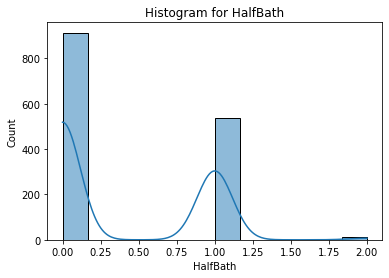

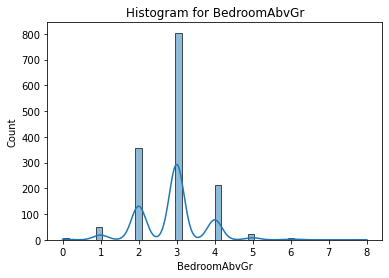

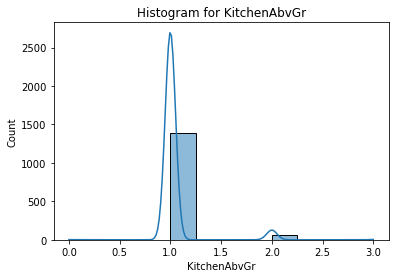

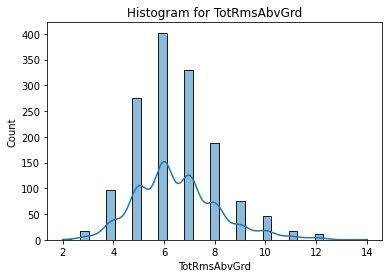

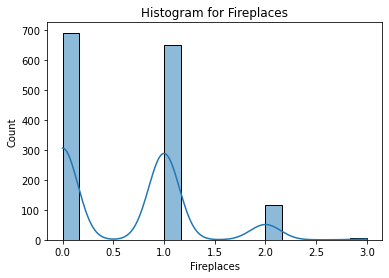

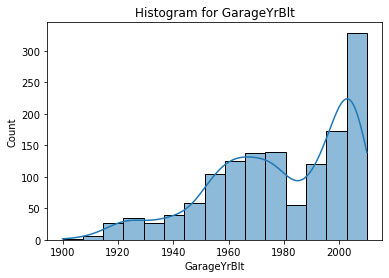

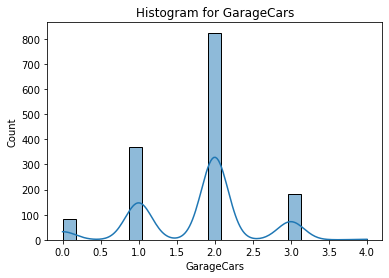

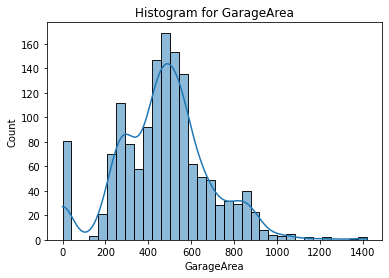

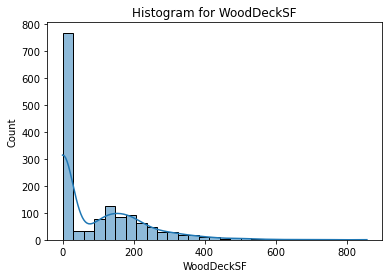

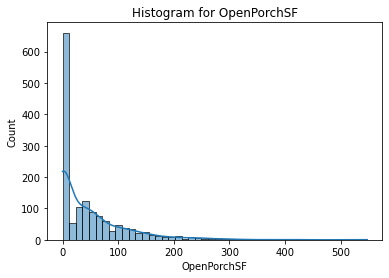

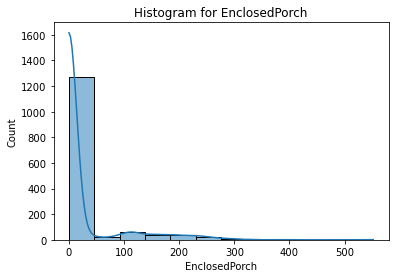

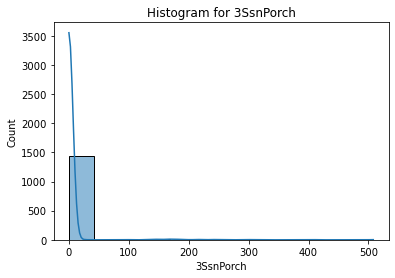

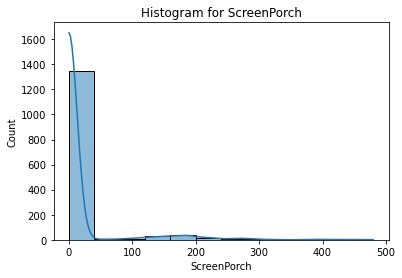

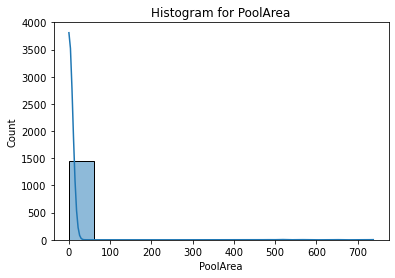

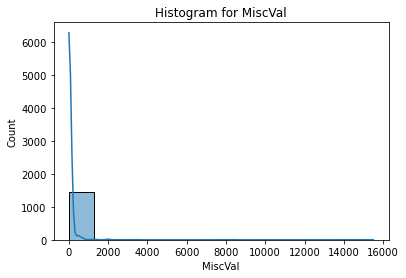

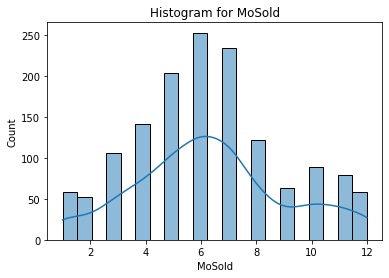

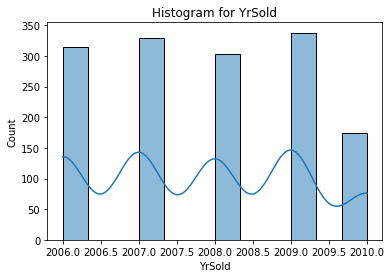

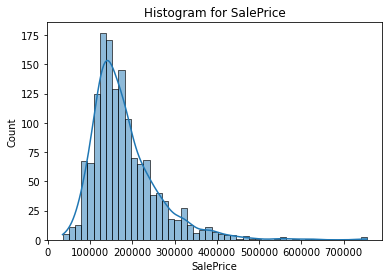

In [15]:
import seaborn as sns
for i in con1:
    sns.histplot(data = df1, x = i, kde = True)
    plt.title(f'Histogram for {i}')
    plt.show()

### Bivariate Analysis

In [16]:
df1.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


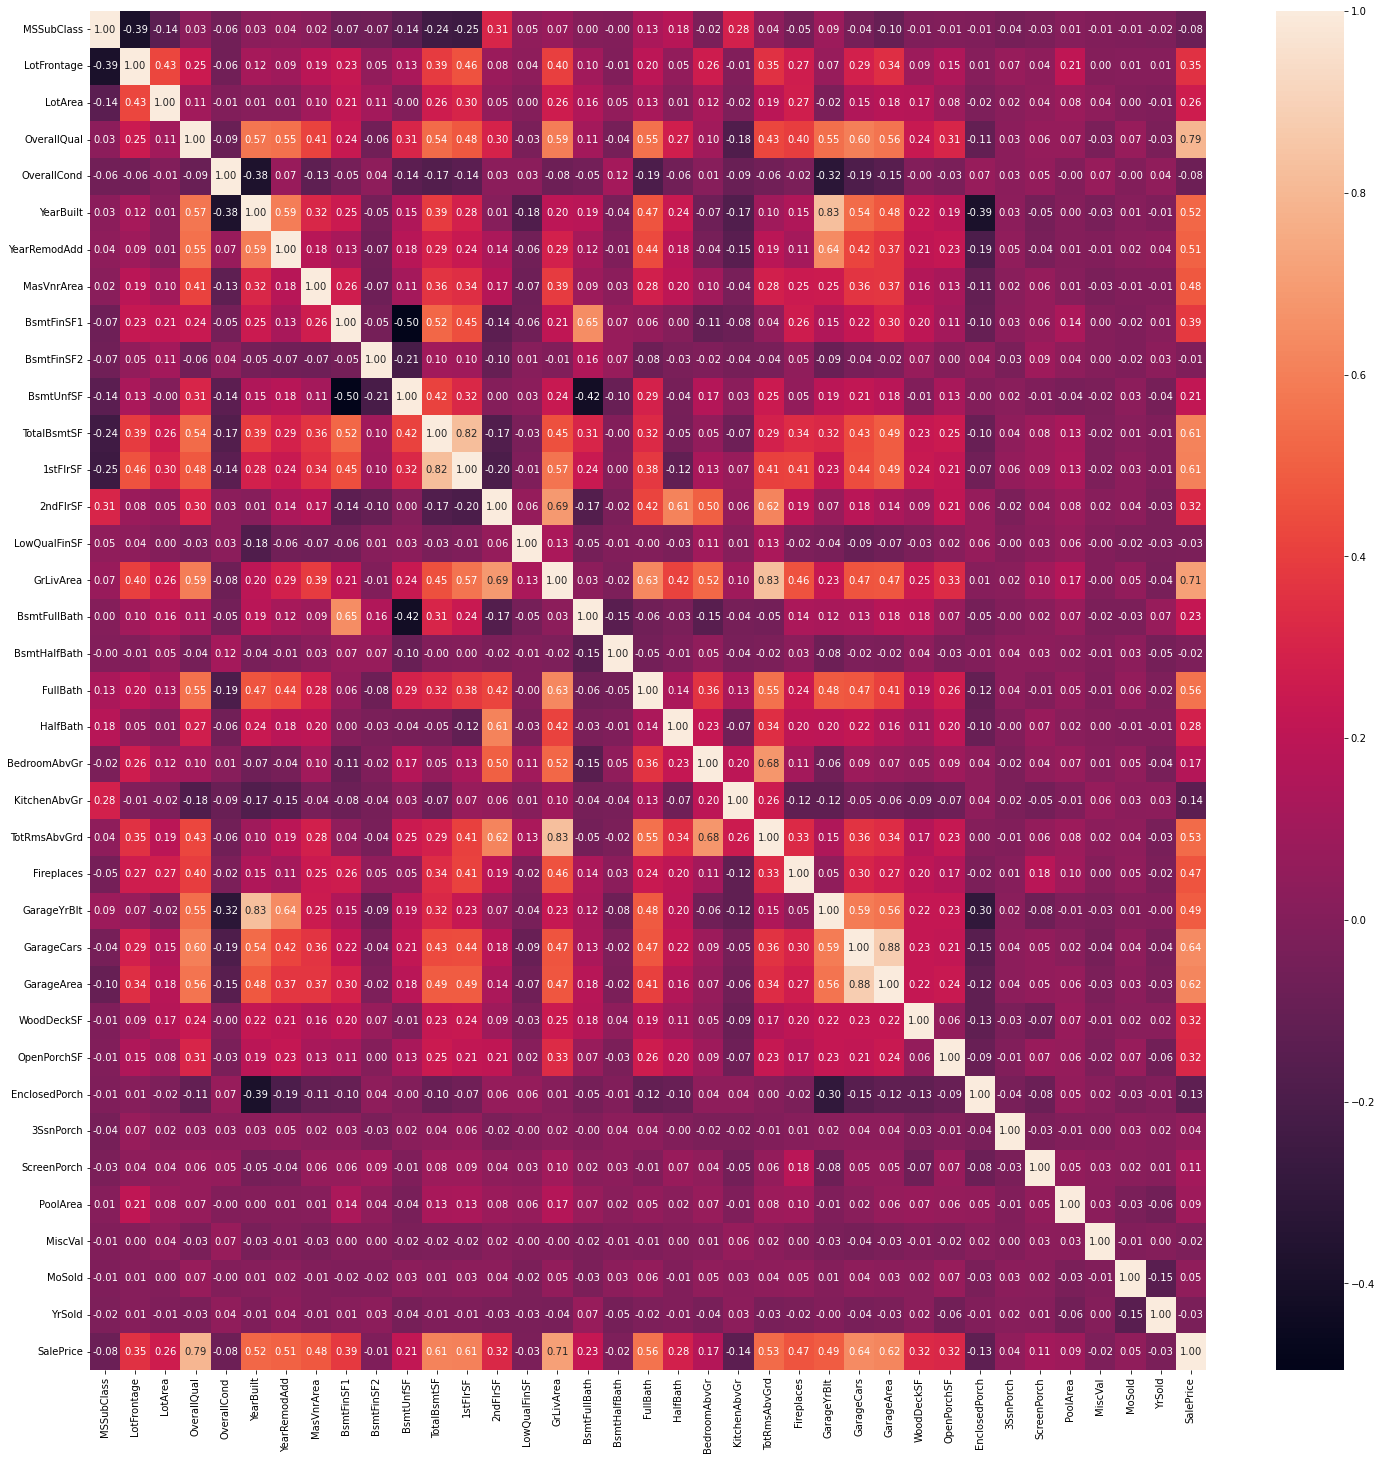

In [17]:
plt.figure(figsize = (25,25))
sns.heatmap(df1.corr(),annot = True, fmt = '.2f')
plt.show()

### Scatterplot of every variable with SalePrice

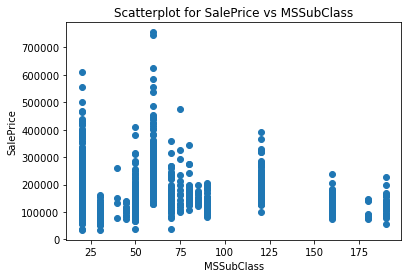

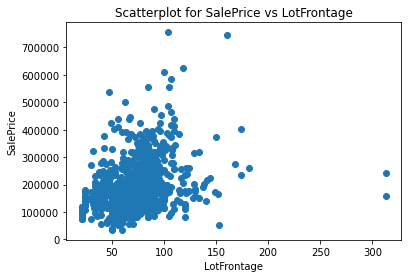

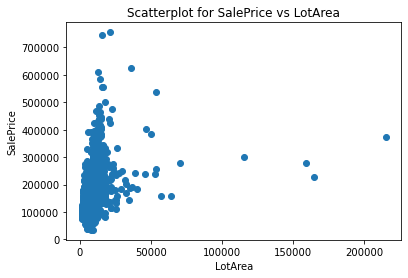

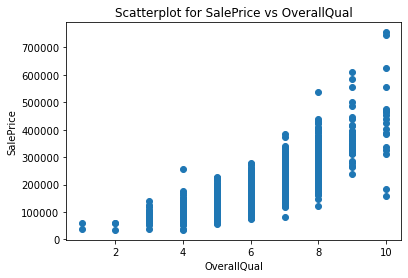

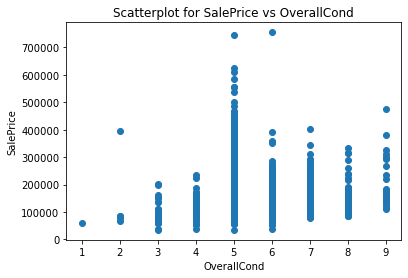

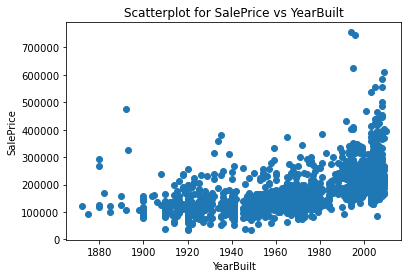

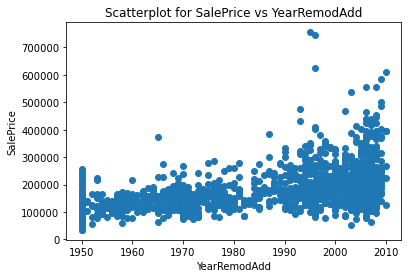

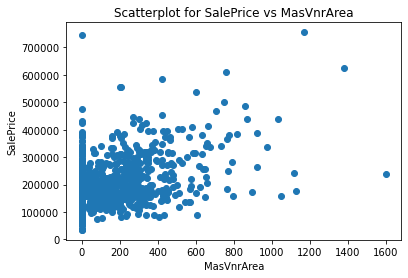

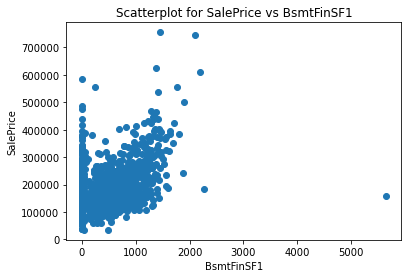

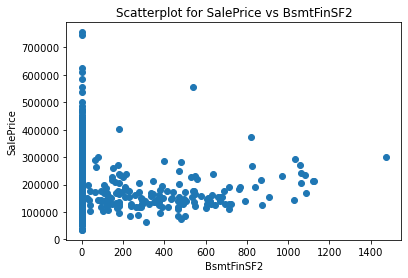

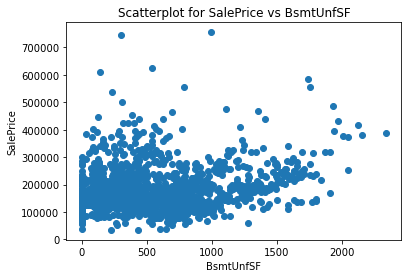

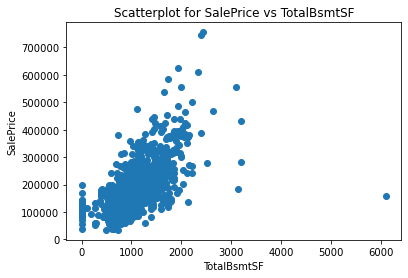

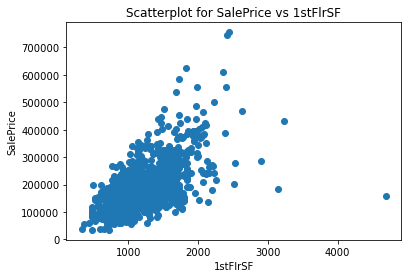

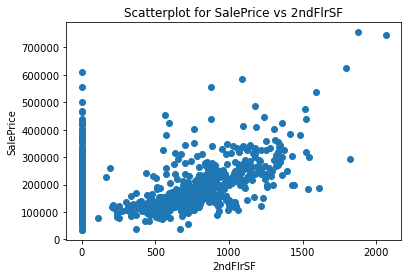

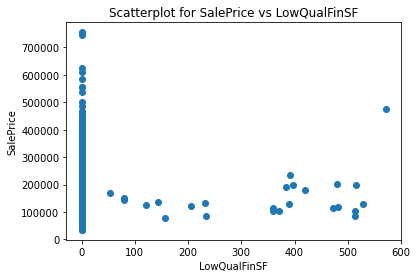

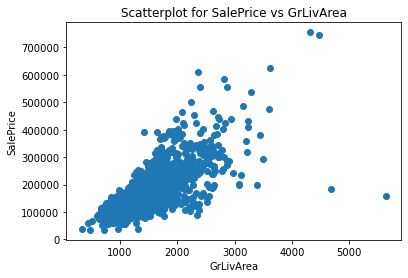

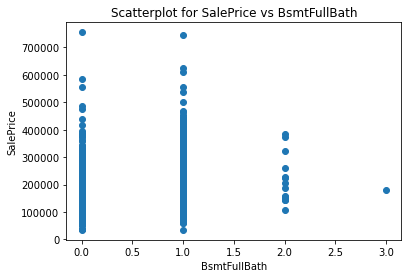

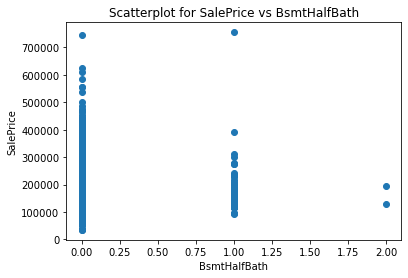

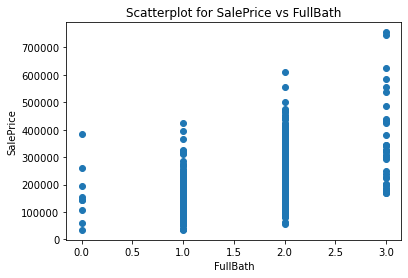

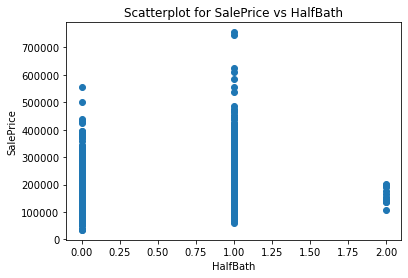

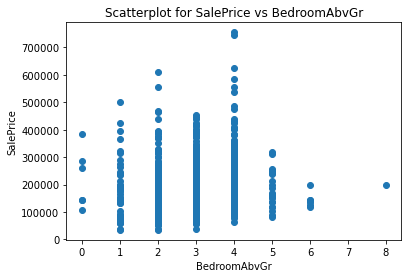

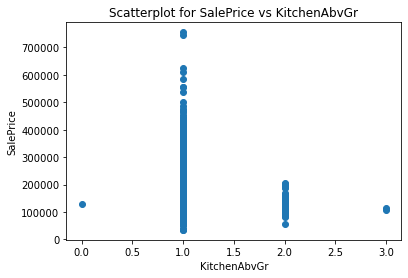

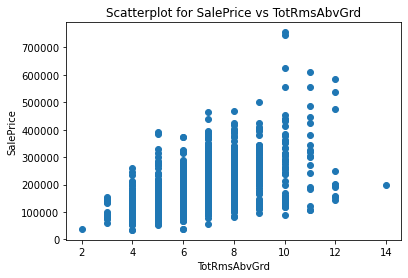

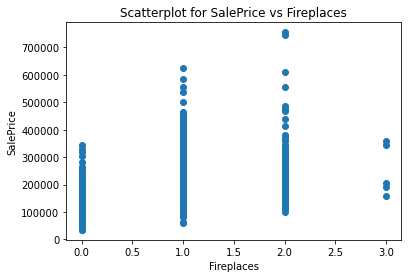

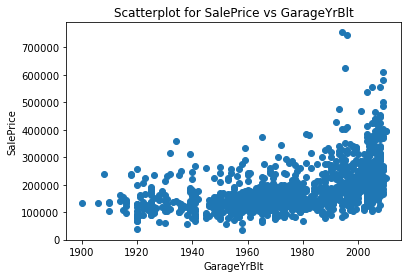

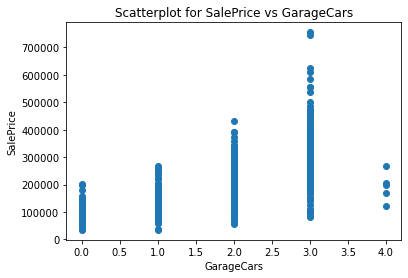

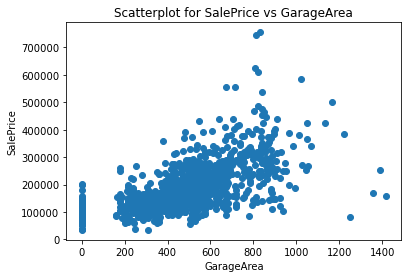

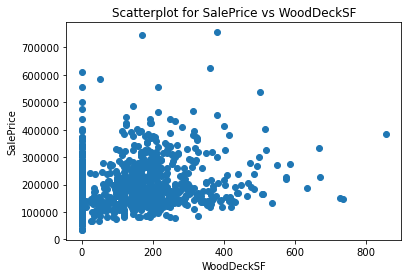

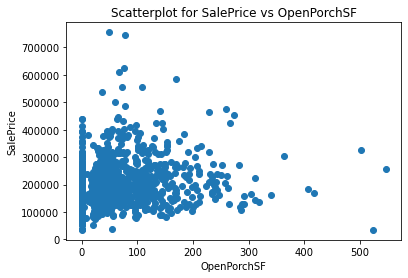

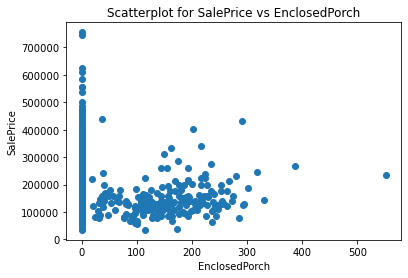

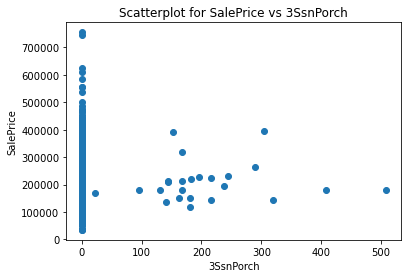

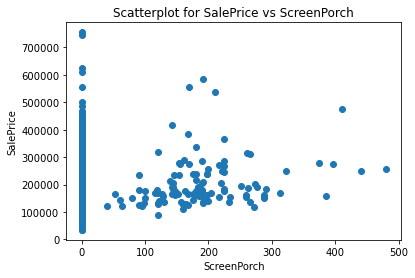

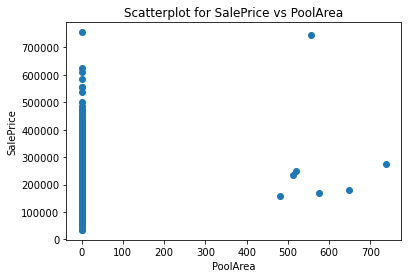

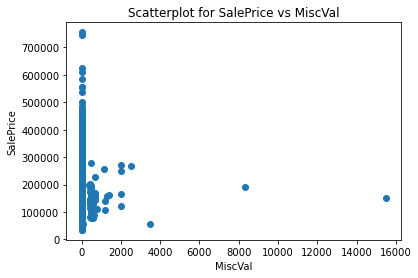

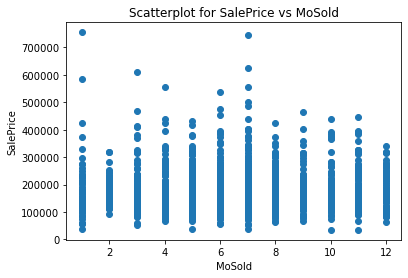

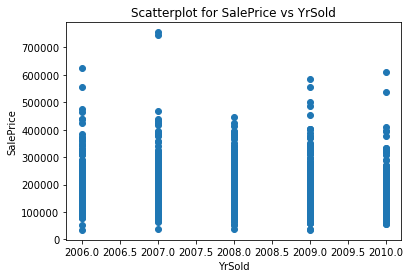

In [18]:
for i in con1:
    if i != 'SalePrice':
        plt.scatter(df1[i], df1['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.title(f'Scatterplot for SalePrice vs {i}')
        plt.show()

### Boxplot for continuous features with SalePrice

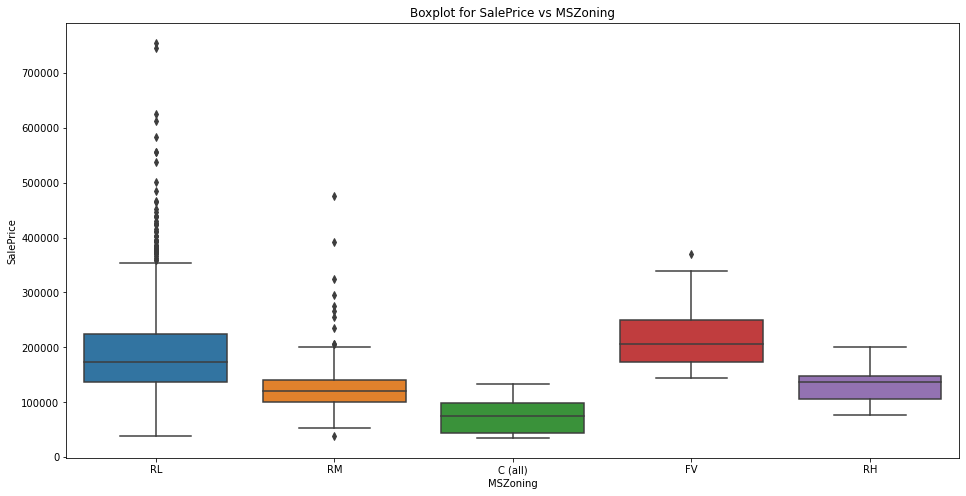

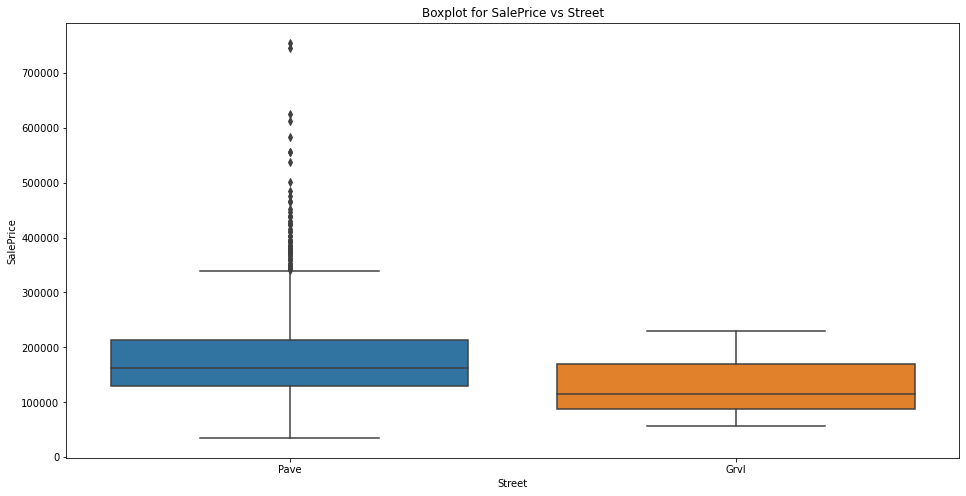

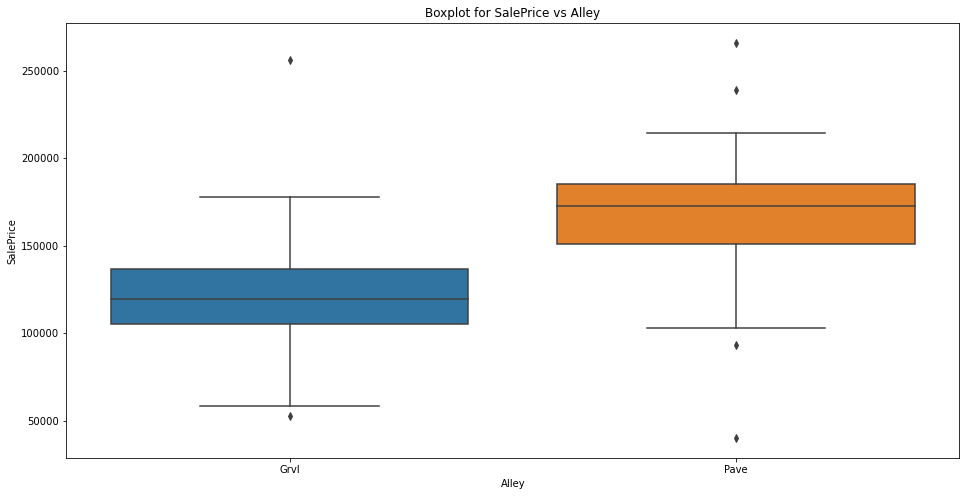

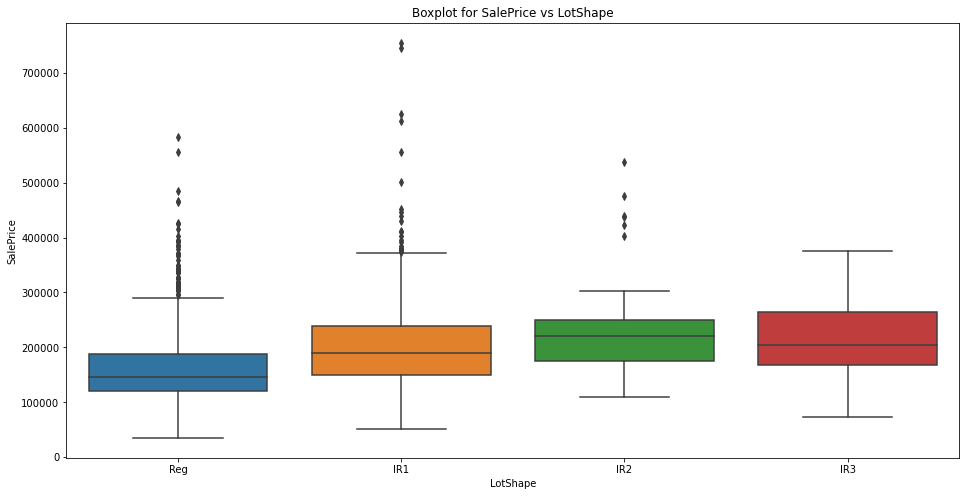

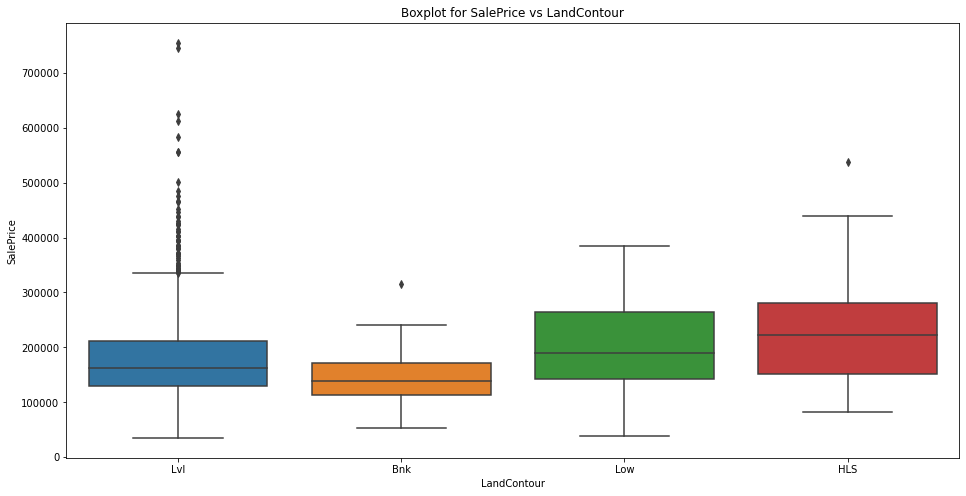

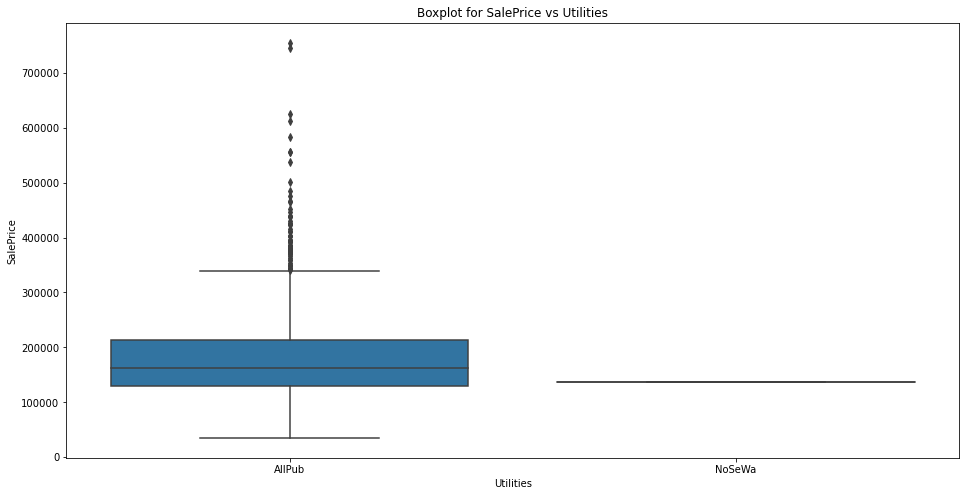

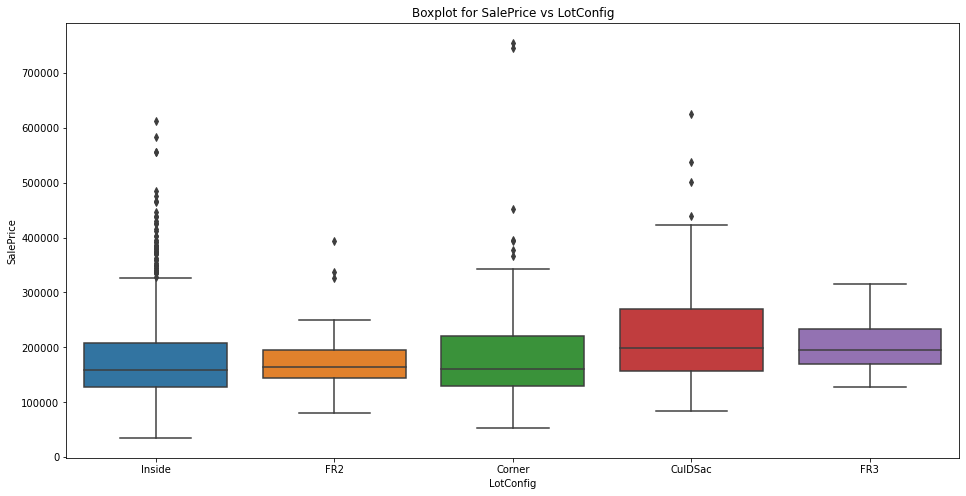

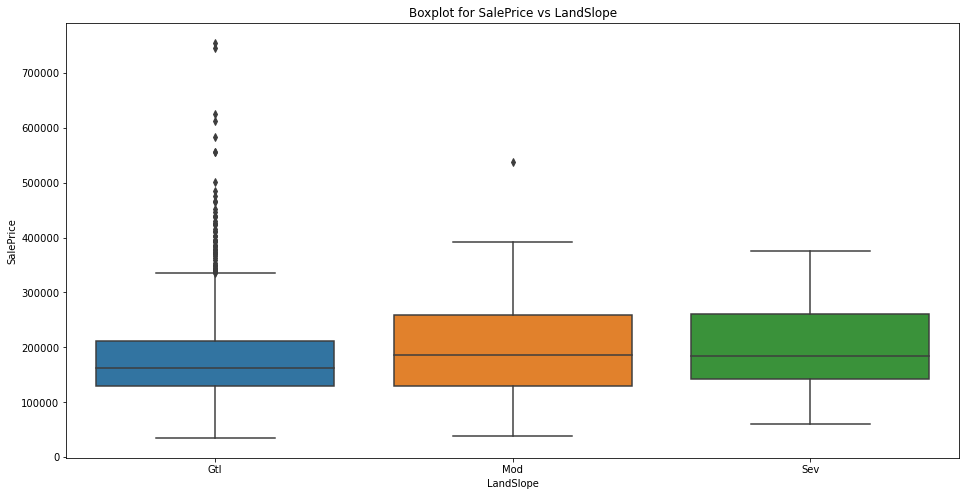

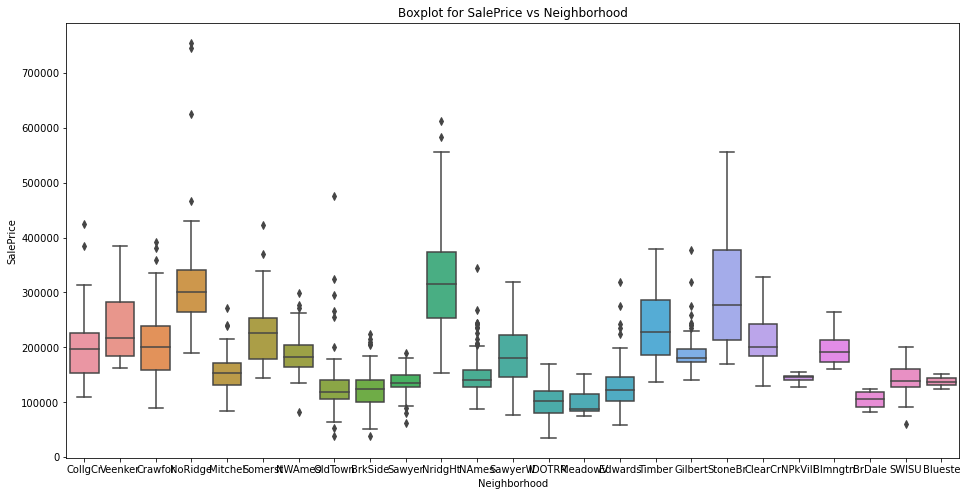

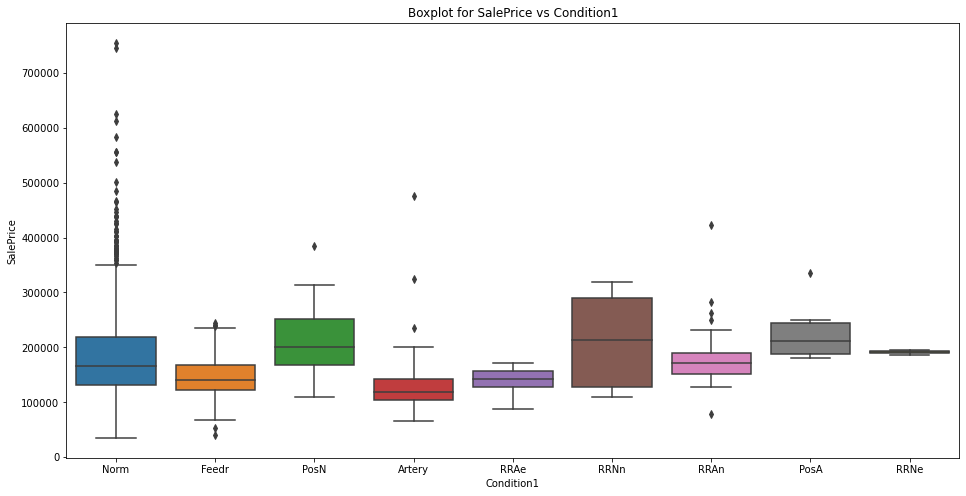

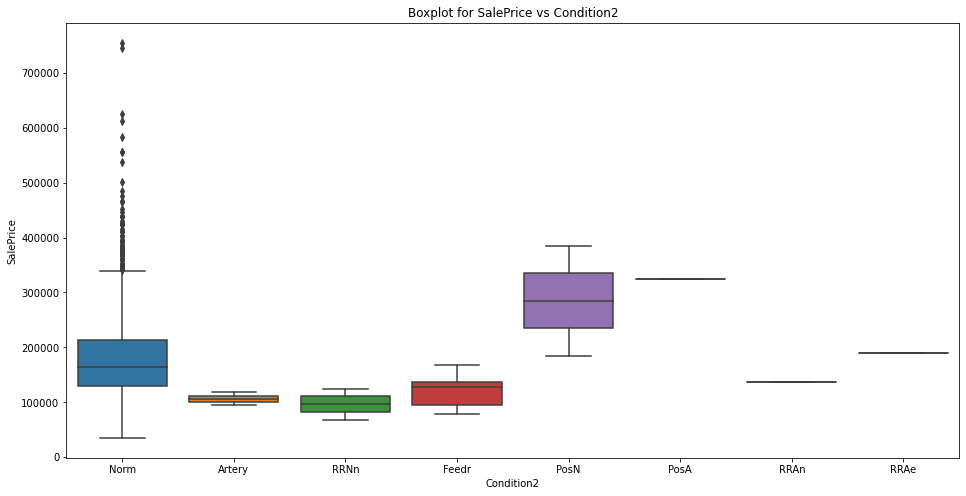

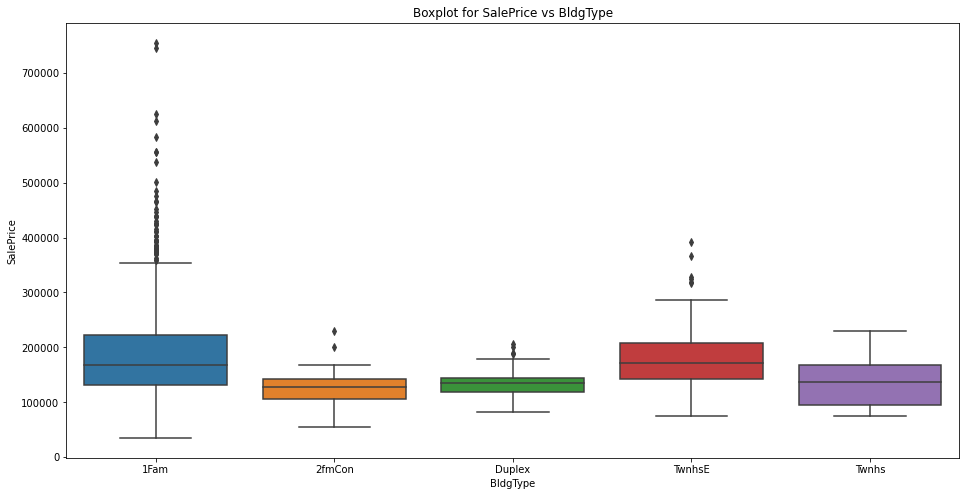

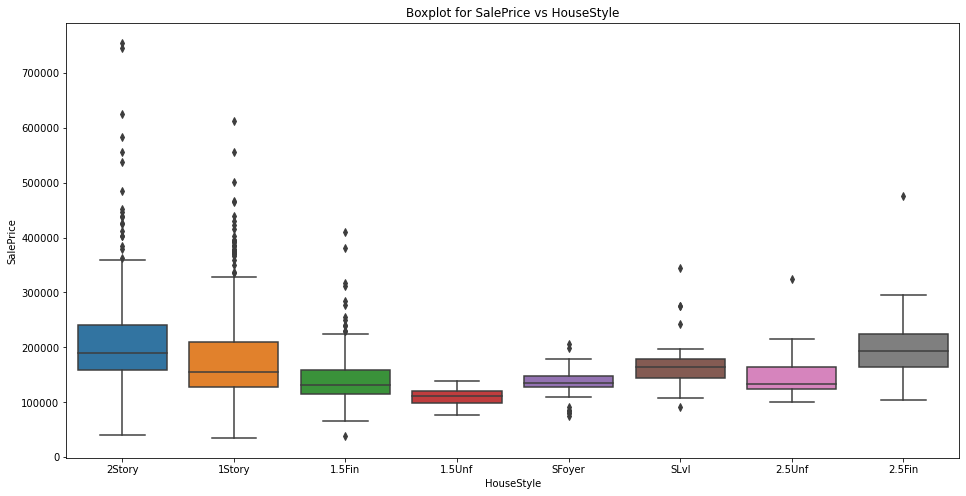

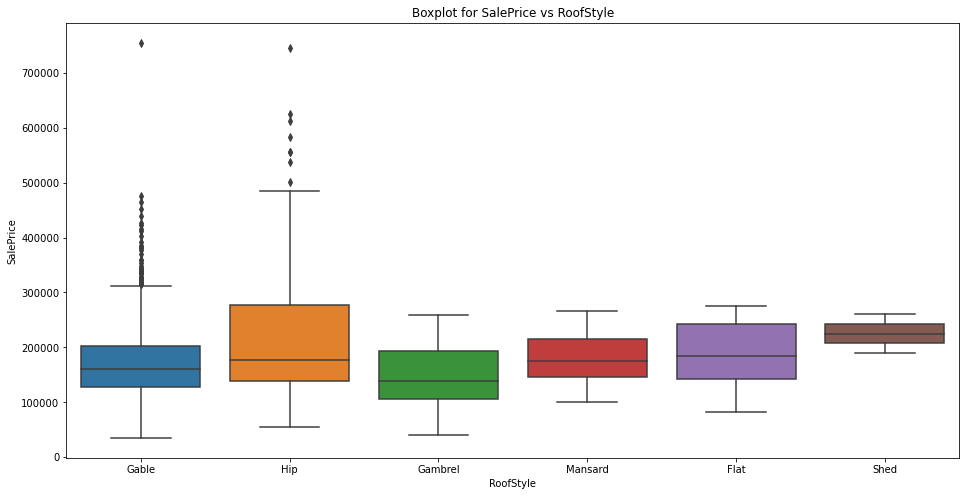

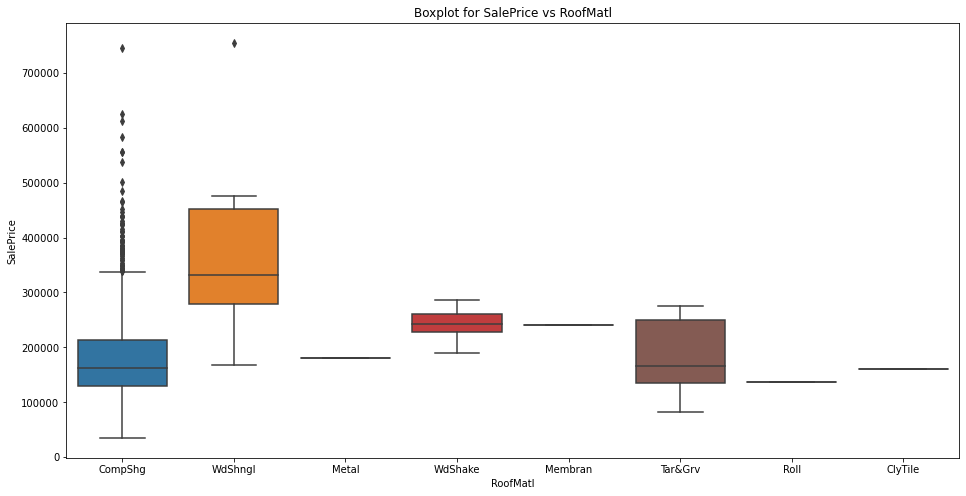

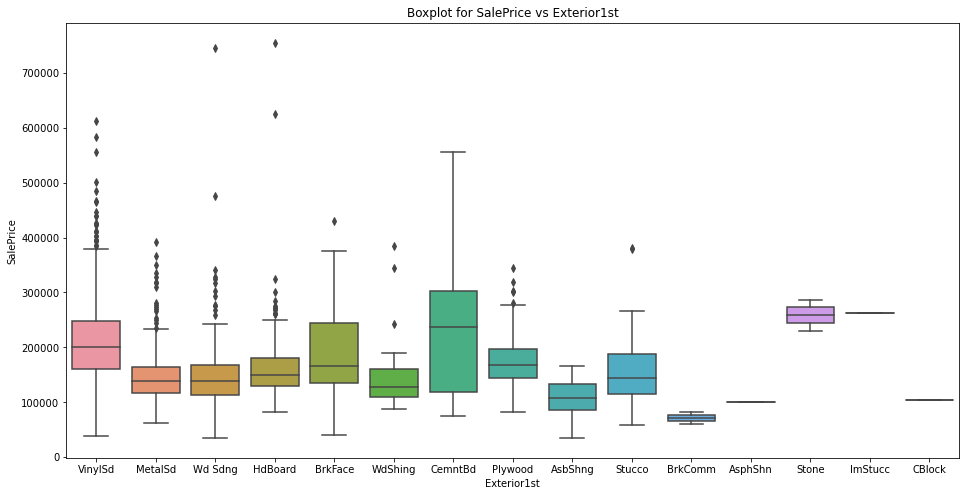

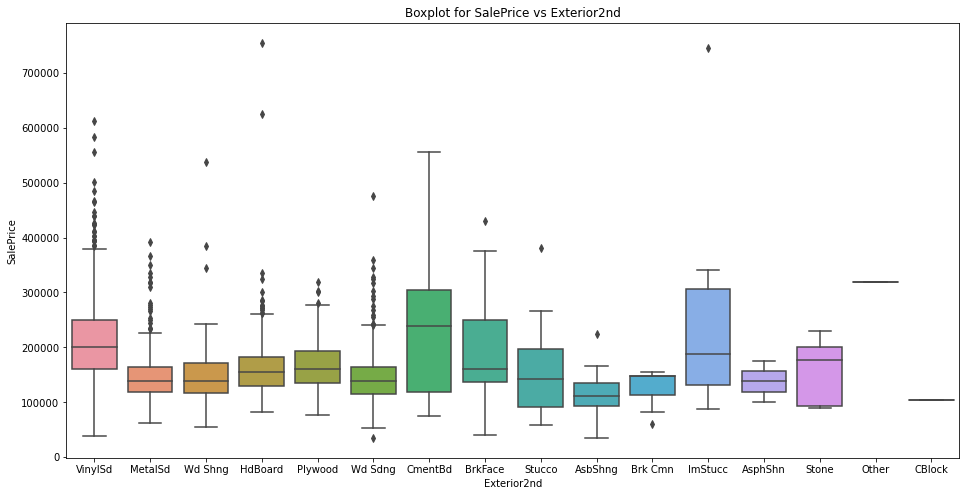

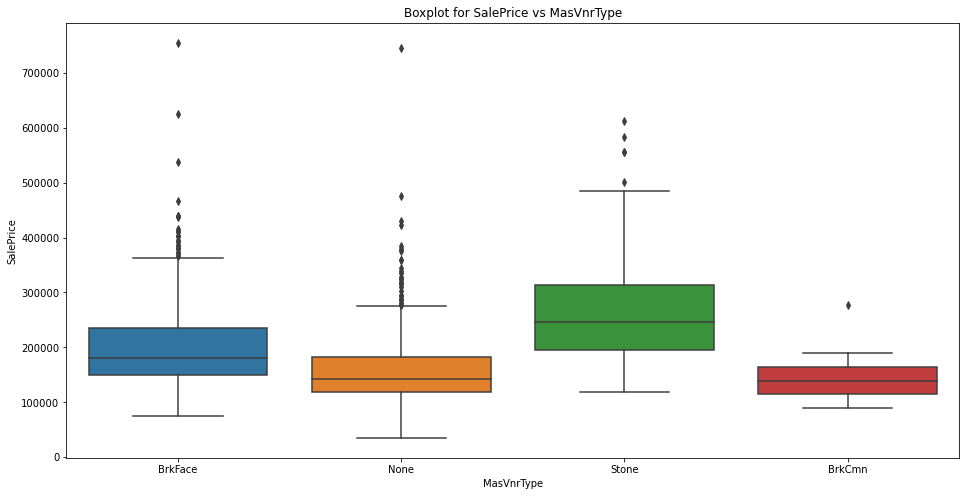

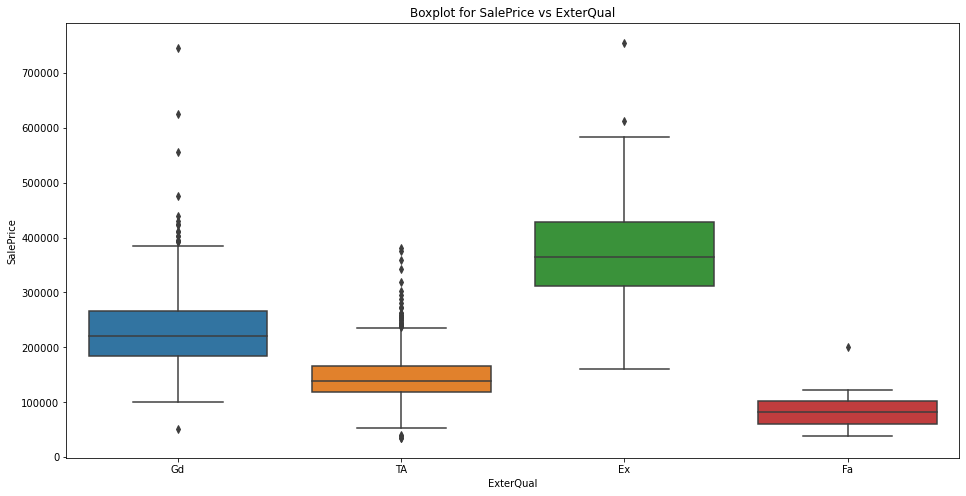

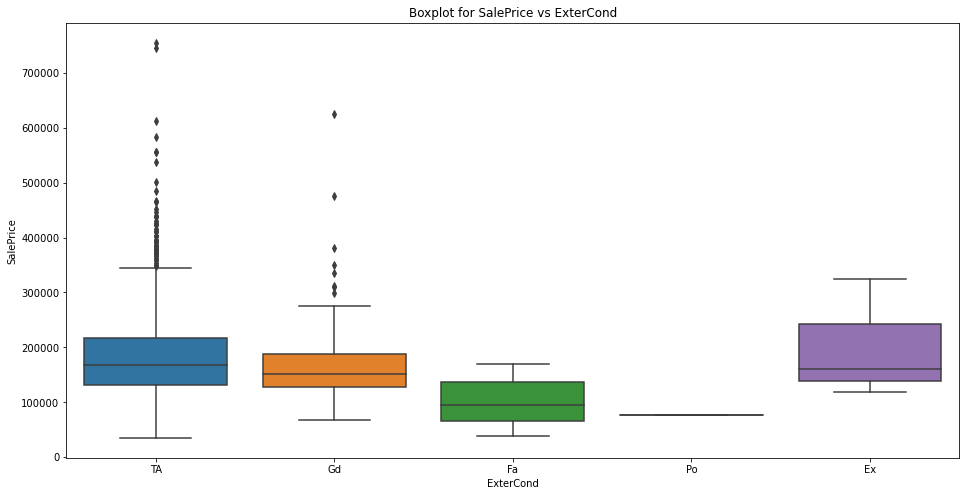

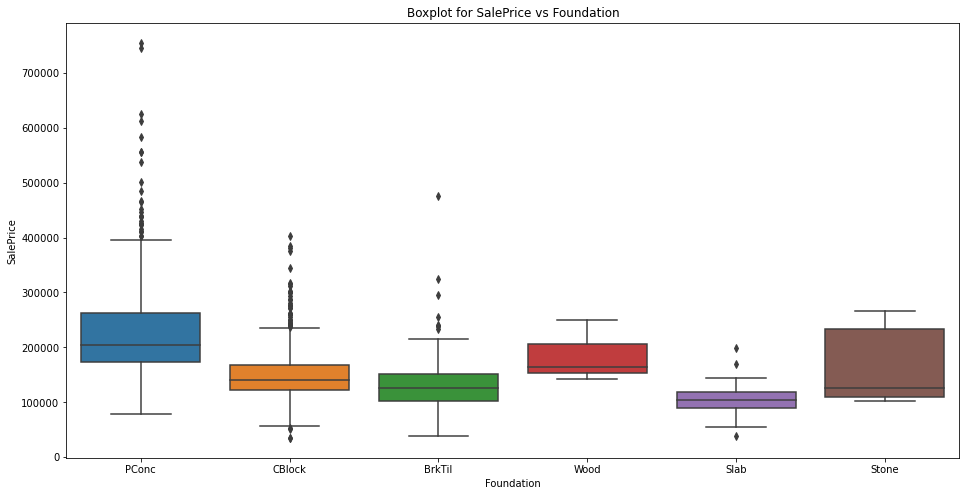

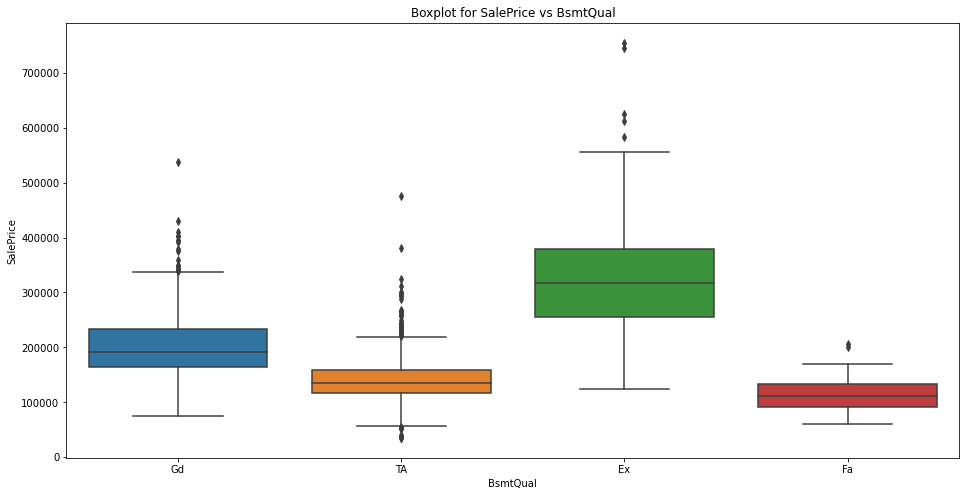

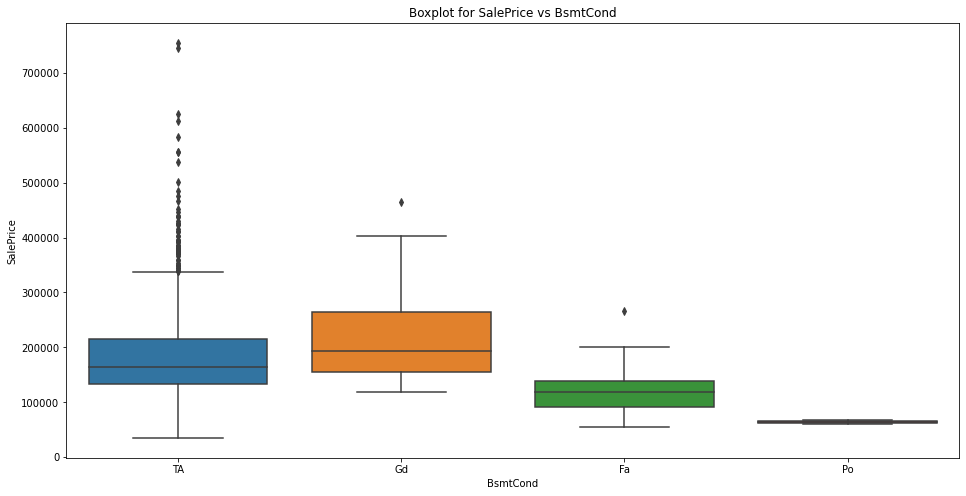

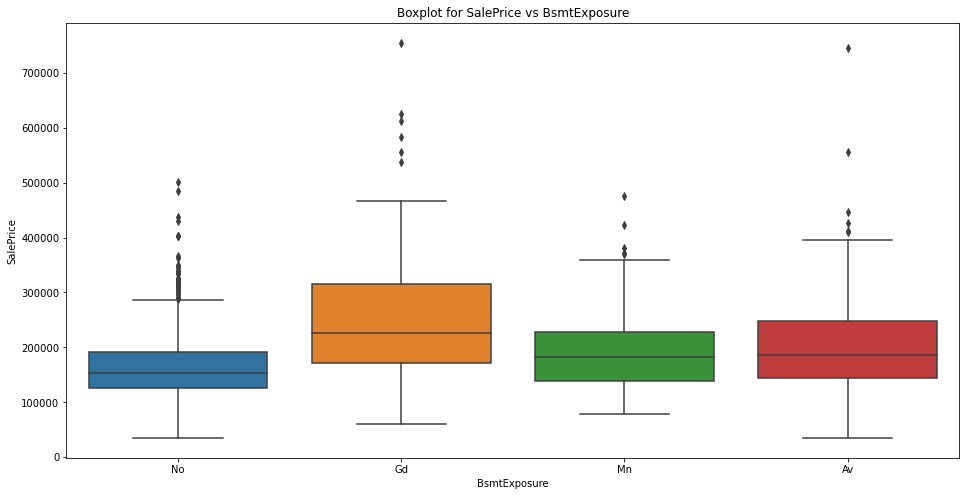

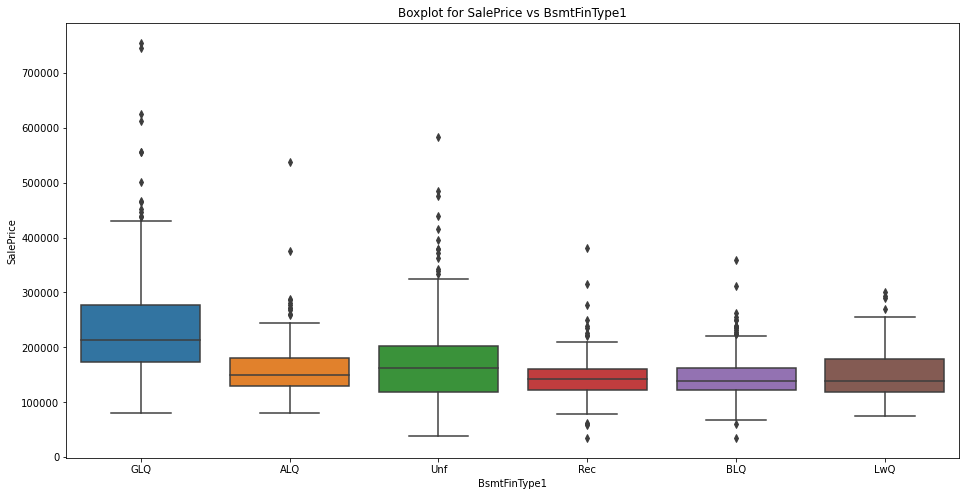

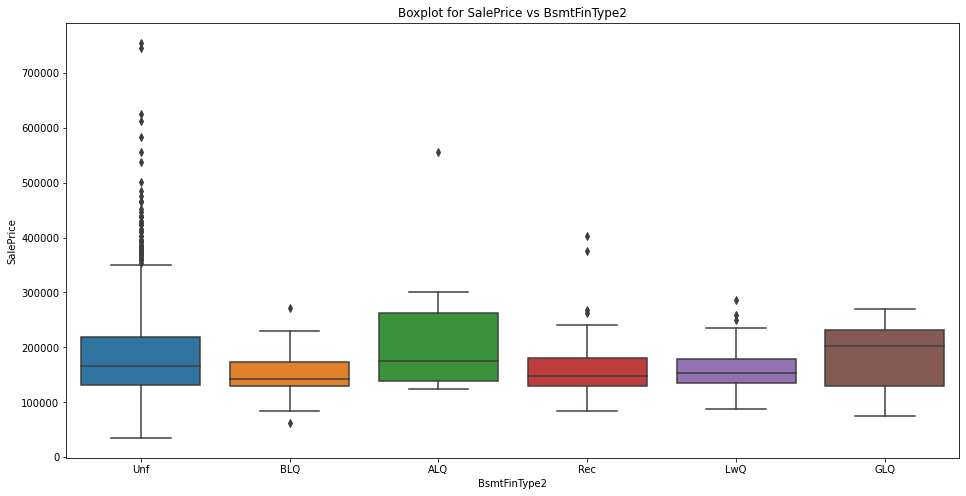

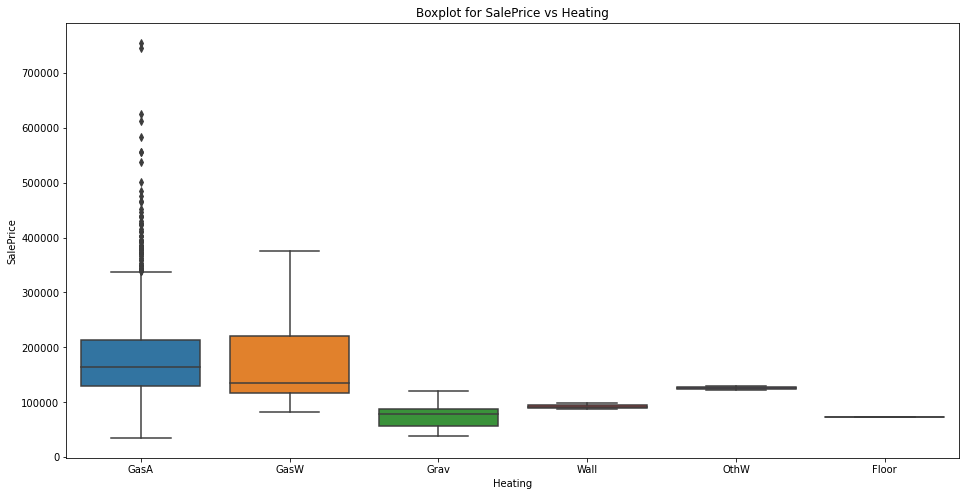

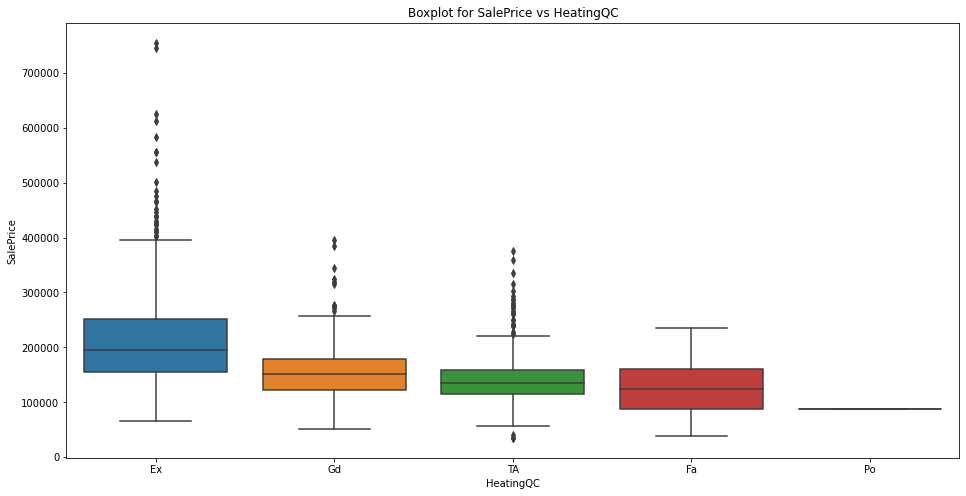

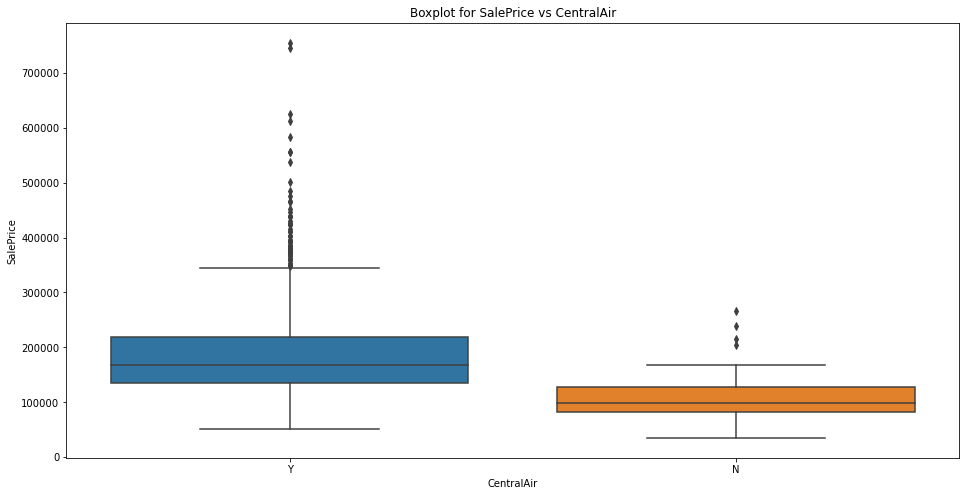

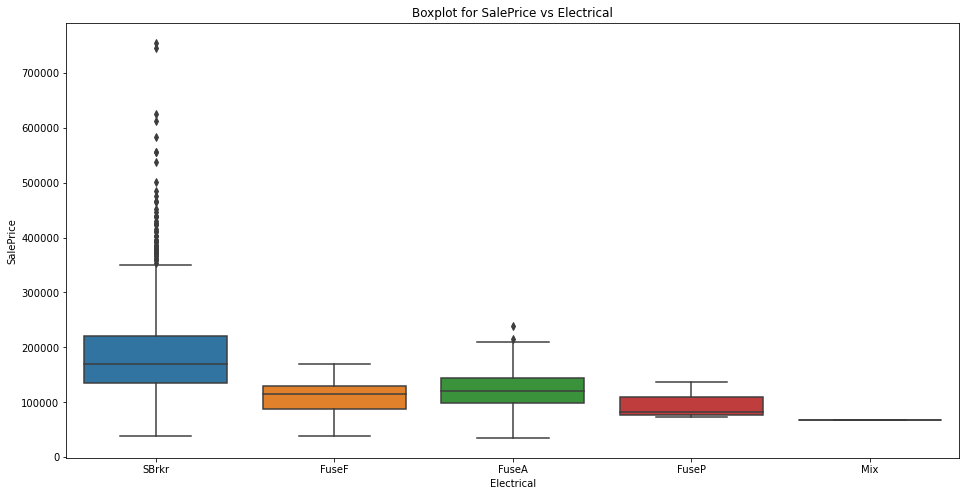

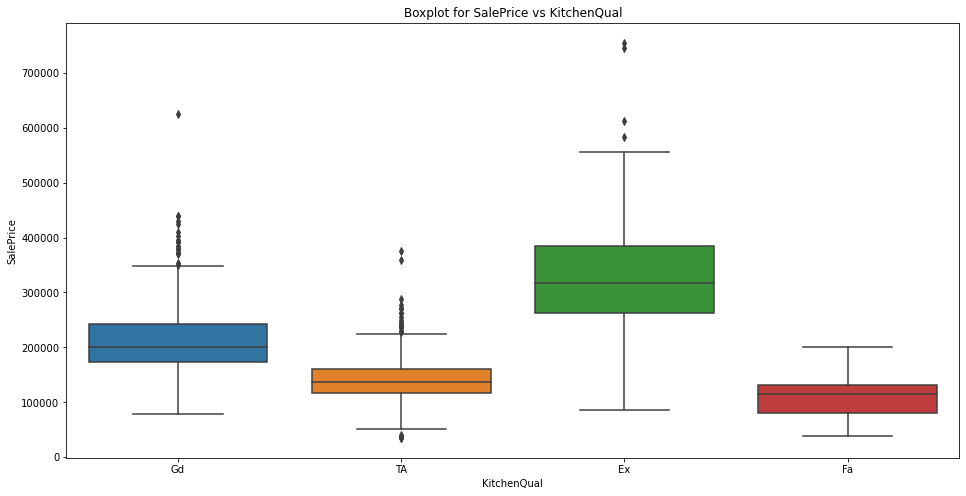

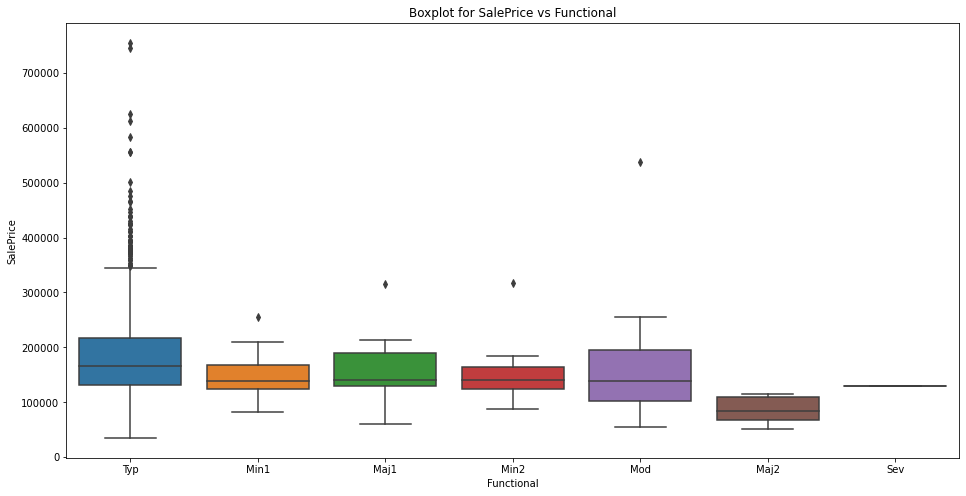

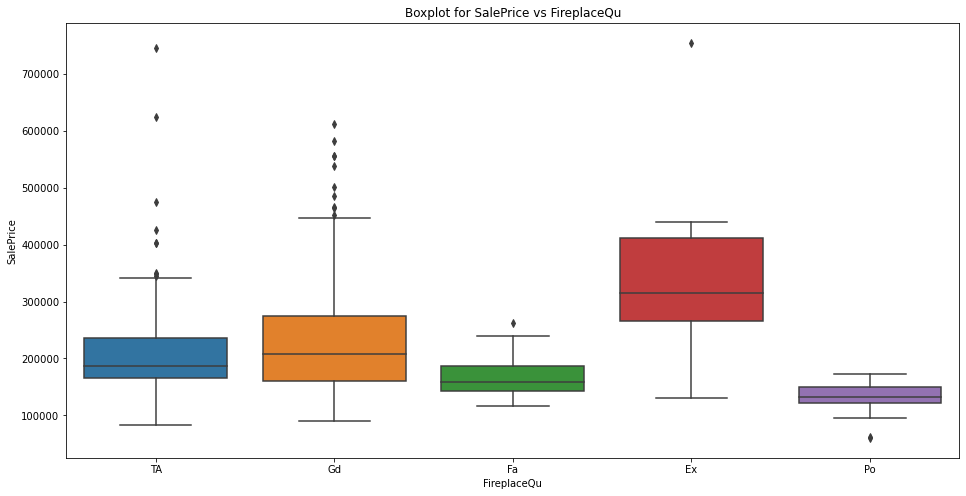

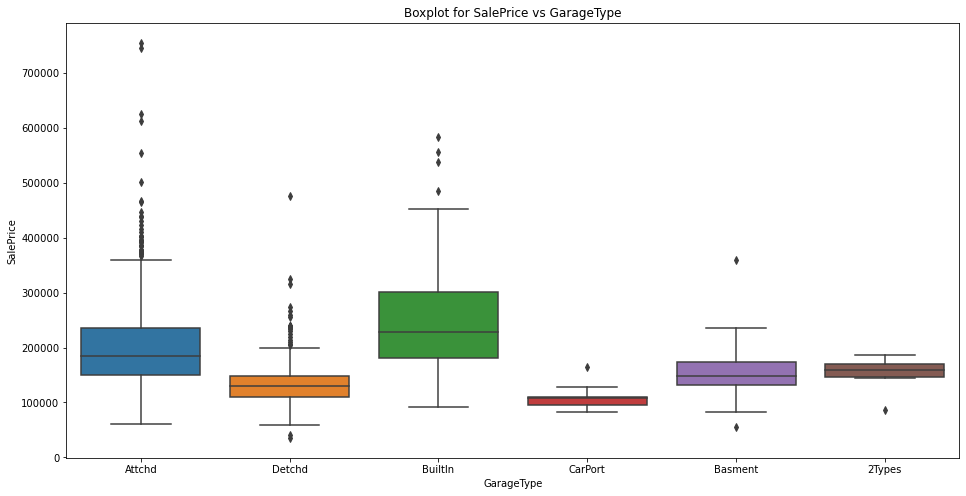

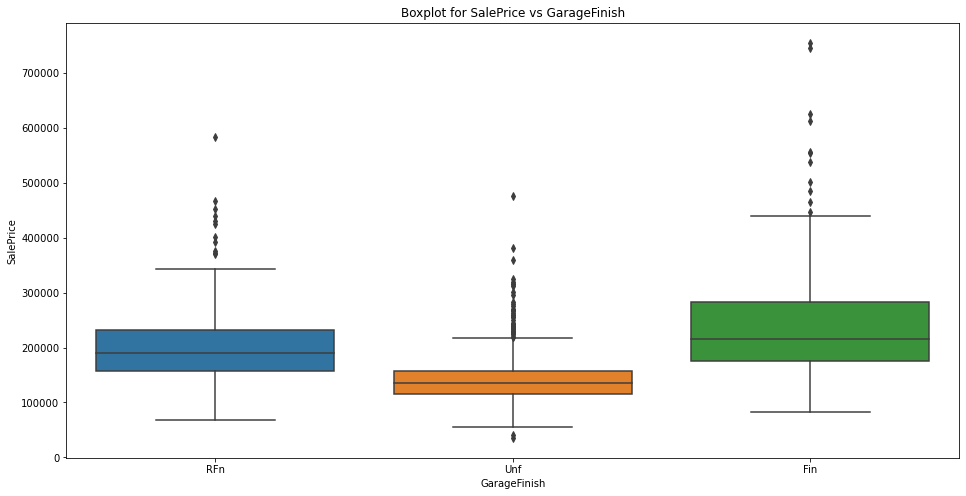

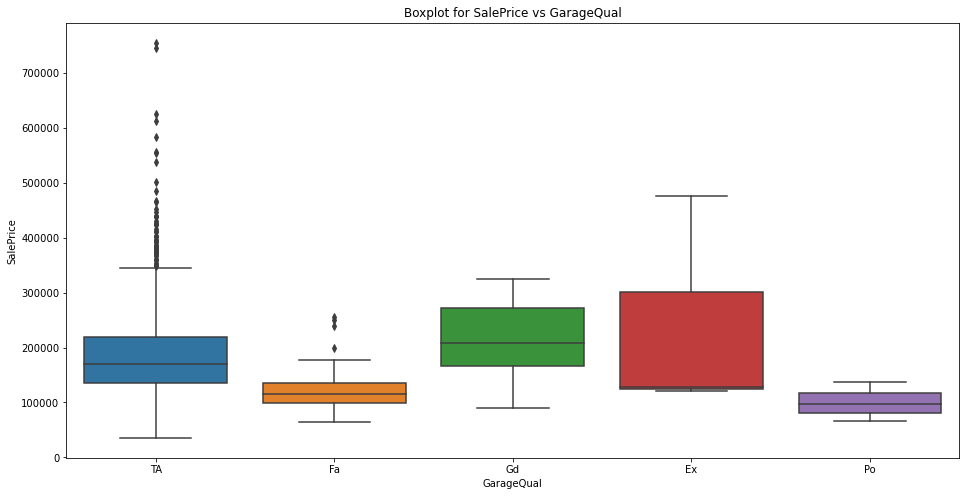

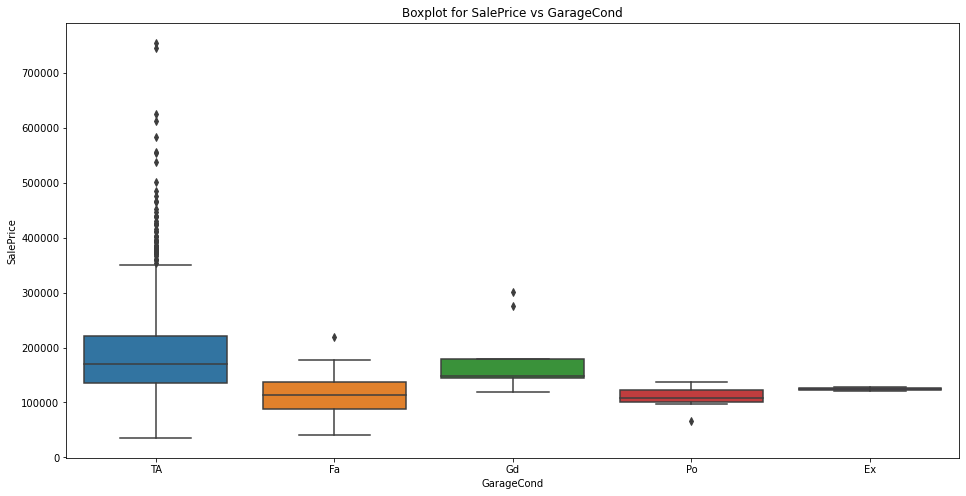

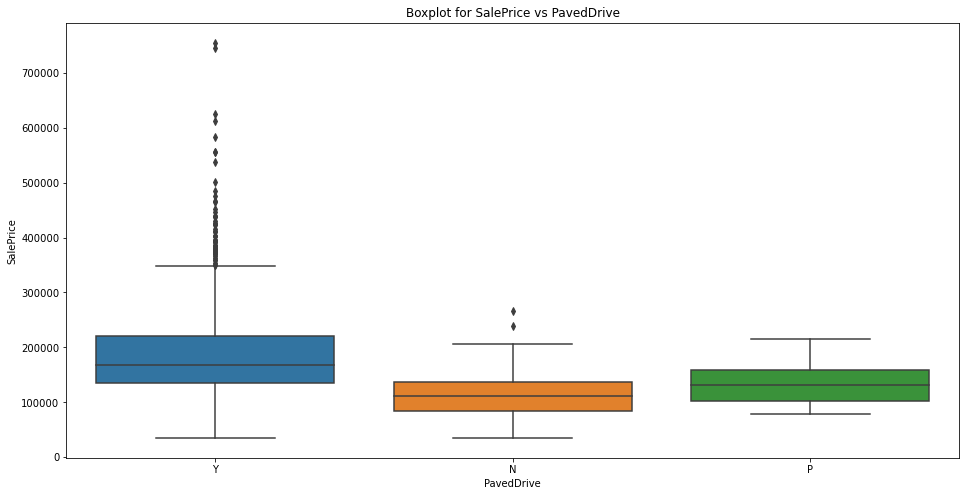

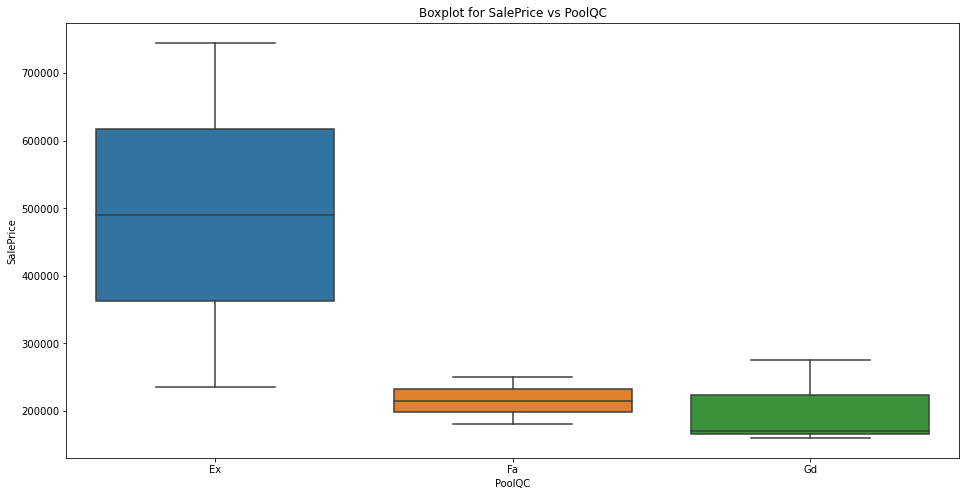

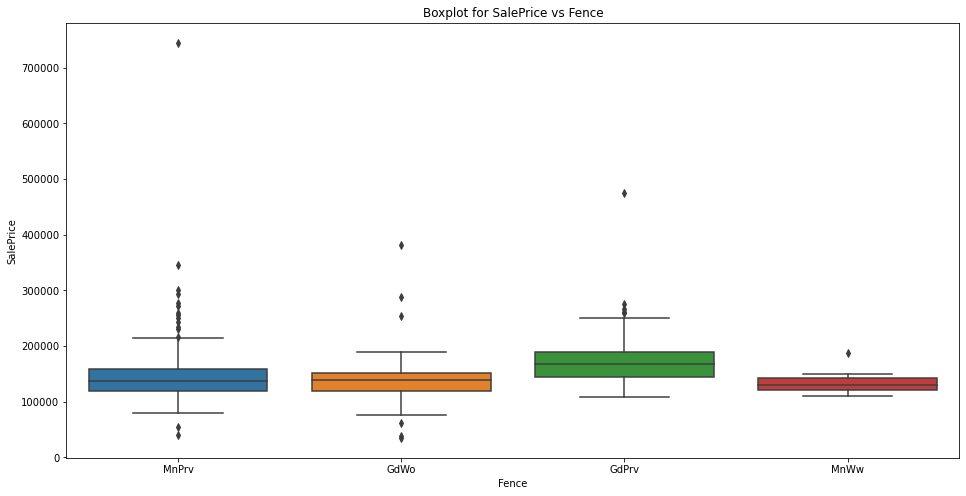

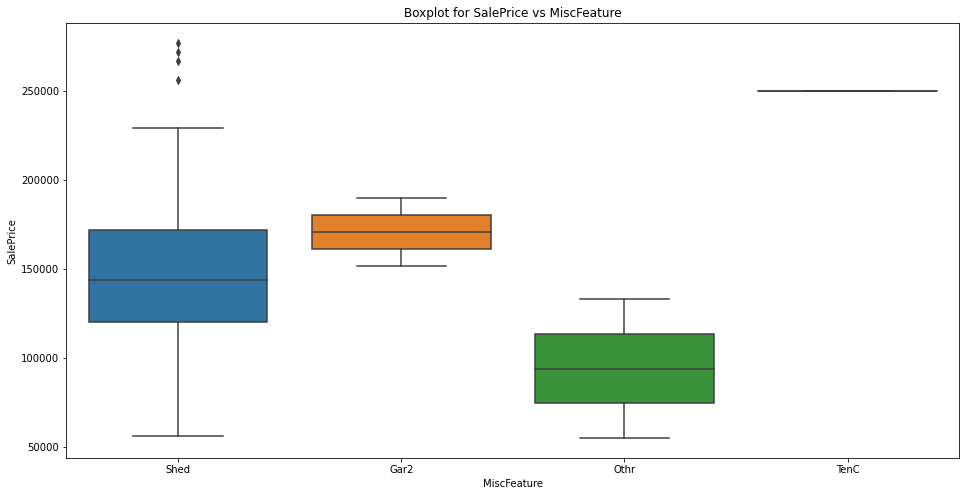

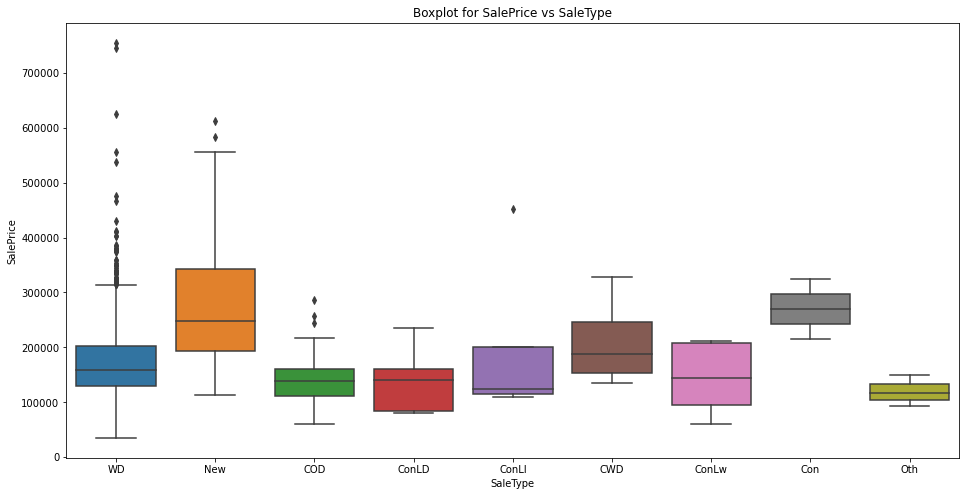

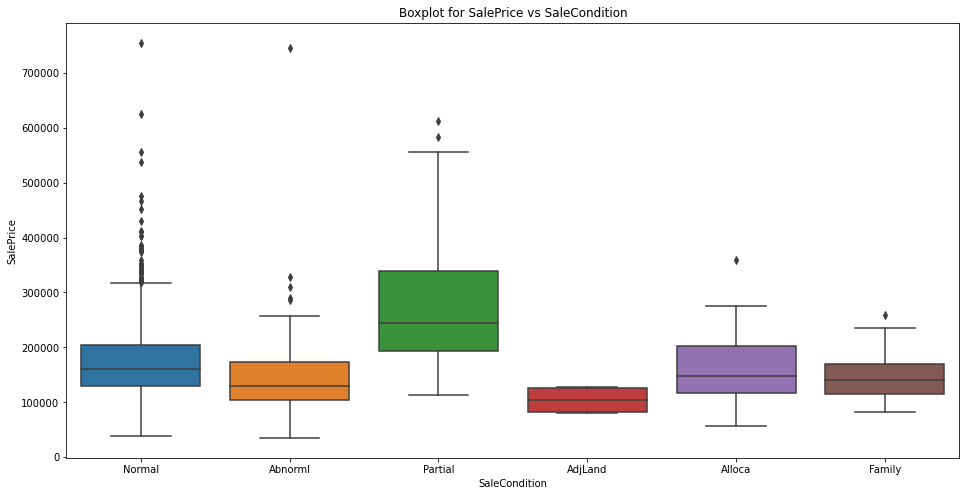

In [19]:
for i in cat1:
    plt.figure(figsize = (16, 8))
    sns.boxplot(data = df1, x = i, y = 'SalePrice')
    plt.title(f'Boxplot for SalePrice vs {i}')
    plt.show()

### Preprocessing

#### Separate X & Y

In [20]:
X = df1.drop(labels = ['SalePrice'], axis = 1)
Y = df1[['SalePrice']]

In [21]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [22]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [23]:
cat2, con2 = catconsep(X)

In [24]:
cat2

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
con2

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [26]:
catx = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
        'BsmtFinType2','FireplaceQu','GarageType',
        'GarageFinish','GarageQual','GarageCond',
        'PoolQC','Fence','MiscFeature']

In [27]:
cat3 = []
for i in cat2:
    if i not in catx:
        cat3.append(i)

In [28]:
cat3

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Pipeline for Feature selection(Ordinal Encoder on Categorical)
1. num_pipeline : strategy='median', StandardScaler
2. cat_pipe1 : strategy='constant',OrdinalEncoder
3. cat_pipe2 : strategy='most_frequent', Ordinal Encoder

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [90]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ordinal',OrdinalEncoder())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ordinal',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con2),
                         ('catx',cat_pipe1,catx),
                         ('cat3',cat_pipe2,cat3)])

In [91]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath...
                                 ['MSZoning', 'Street', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'Heating',
                                  'HeatingQC', 'CentralAir', 'Electrical',
                                  'KitchenQual', 'Functional', 'PavedDrive',
                                  'SaleType', 'SaleCondition'])])

In [92]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  2.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  2.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  2.        ,
         8.        ,  4.        ]])

In [93]:
cols1 = pre.get_feature_names_out()
cols1

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'catx__Alley',
       'catx__BsmtQual', 'catx__BsmtCond', 'catx__BsmtExposure',
       'catx__BsmtFinType1', 'catx__BsmtFinType2', 'catx__FireplaceQu',
       'catx__GarageType', 'catx__GarageFinish', 'catx__GarageQual',
       'catx__G

In [94]:
X_pre = pd.DataFrame(X_pre, columns= cols1)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat3__Foundation,cat3__Heating,cat3__HeatingQC,cat3__CentralAir,cat3__Electrical,cat3__KitchenQual,cat3__Functional,cat3__PavedDrive,cat3__SaleType,cat3__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,1.0,0.0,1.0,4.0,3.0,6.0,2.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,2.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,8.0,4.0


### Perform Feature Selection

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
model = LinearRegression()
sel = SequentialFeatureSelector(model,direction='backward',n_jobs=-1)
sel_features = sel.fit_transform(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__GrLivArea', 'num__BsmtHalfBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__EnclosedPorch',
       'num__ScreenPorch', 'num__YrSold', 'catx__BsmtQual',
       'catx__BsmtExposure', 'catx__FireplaceQu', 'catx__GarageQual',
       'catx__Fence', 'catx__MiscFeature', 'cat3__MSZoning',
       'cat3__LandContour', 'cat3__LandSlope', 'cat3__Neighborhood',
       'cat3__BldgType', 'cat3__HouseStyle', 'cat3__RoofMatl',
       'cat3__MasVnrType', 'cat3__ExterQual', 'cat3__HeatingQC',
       'cat3__KitchenQual', 'cat3__Functional', 'cat3__SaleCondition'],
      dtype=object)

In [65]:
sel_cols[0]

'num__MSSubClass'

In [96]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [97]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'BsmtQual',
 'BsmtExposure',
 'FireplaceQu',
 'GarageQual',
 'Fence',
 'MiscFeature',
 'MSZoning',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'SaleCondition']

In [98]:
X_sel = X[imp_cols]

In [99]:
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Neighborhood,BldgType,HouseStyle,RoofMatl,MasVnrType,ExterQual,HeatingQC,KitchenQual,Functional,SaleCondition
0,60,8450,7,5,2003,196.0,706,0,150,856,...,CollgCr,1Fam,2Story,CompShg,BrkFace,Gd,Ex,Gd,Typ,Normal
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,Veenker,1Fam,1Story,CompShg,None,TA,Ex,TA,Typ,Normal
2,60,11250,7,5,2001,162.0,486,0,434,920,...,CollgCr,1Fam,2Story,CompShg,BrkFace,Gd,Ex,Gd,Typ,Normal
3,70,9550,7,5,1915,0.0,216,0,540,756,...,Crawfor,1Fam,2Story,CompShg,None,TA,Gd,Gd,Typ,Abnorml
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,NoRidge,1Fam,2Story,CompShg,BrkFace,Gd,Ex,Gd,Typ,Normal


### Perform cat, con separation for sel columns

In [100]:
cat_sel, con_sel = catconsep(X_sel)

In [101]:
cat_sel

['BsmtQual',
 'BsmtExposure',
 'FireplaceQu',
 'GarageQual',
 'Fence',
 'MiscFeature',
 'MSZoning',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'SaleCondition']

In [102]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold']

In [103]:
cat_sel1 = []
cat_sel2 = []
for i in cat_sel:
    if i in catx:
        cat_sel1.append(i)
    else:
        cat_sel2.append(i)

In [104]:
cat_sel1

['BsmtQual',
 'BsmtExposure',
 'FireplaceQu',
 'GarageQual',
 'Fence',
 'MiscFeature']

In [105]:
cat_sel2

['MSZoning',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'SaleCondition']

### Create final Sklearn Pipelearn(One hot Encoder)

In [106]:
from sklearn.preprocessing import OneHotEncoder

In [107]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre_sel = ColumnTransformer([('num',num_pipe,con_sel),
                             ('catx',cat_pipe1,cat_sel1),
                             ('cat3',cat_pipe2,cat_sel2)])

In [108]:
X_sel_pre = pre_sel.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.07337496, -0.20714171,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.09188637, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.07347998,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08016039, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.05811155, -0.79515147, ...,  0.        ,
         1.        ,  0.        ]])

In [109]:
cols2 = pre_sel.get_feature_names_out()
cols2

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__GrLivArea', 'num__BsmtHalfBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__EnclosedPorch',
       'num__ScreenPorch', 'num__YrSold', 'catx__BsmtQual_Ex',
       'catx__BsmtQual_Fa', 'catx__BsmtQual_Gd',
       'catx__BsmtQual_NotAvailable', 'catx__BsmtQual_TA',
       'catx__BsmtExposure_Av', 'catx__BsmtExposure_Gd',
       'catx__BsmtExposure_Mn', 'catx__BsmtExposure_No',
       'catx__BsmtExposure_NotAvailable', 'catx__FireplaceQu_Ex',
       'catx__FireplaceQu_Fa', 'catx__FireplaceQu_Gd',
       'catx__FireplaceQu_NotAvailable', 'catx__FireplaceQu_Po',
       'catx__FireplaceQu_TA', 'catx__GarageQual_Ex',
       'catx__GarageQual_Fa', 'catx__GarageQual_Gd',
       'catx__GarageQual_NotAvai

In [110]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=cols2)
X_sel_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat3__Functional_Min2,cat3__Functional_Mod,cat3__Functional_Sev,cat3__Functional_Typ,cat3__SaleCondition_Abnorml,cat3__SaleCondition_AdjLand,cat3__SaleCondition_Alloca,cat3__SaleCondition_Family,cat3__SaleCondition_Normal,cat3__SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.087911,0.759659,0.722112,0.049262,1.104925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,-0.570750,-0.369871,-0.288653,0.701265,0.215641,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,-0.570750,-0.865548,6.092188,-1.284176,0.046905,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Perform train test split

In [111]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)

In [112]:
xtrain.shape

(1168, 140)

In [113]:
xtest.shape

(292, 140)

### Ridge Model: Hypermeter Tuning

In [114]:
import numpy as np
params = {'alpha':np.arange(0.1,100,0.1)}

In [115]:
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [116]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model1 =Ridge()
gscv = GridSearchCV(model1,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [117]:
gscv.best_params_

{'alpha': 20.800000000000004}

In [118]:
gscv.best_score_

-1056790826.362887

In [119]:
best_ridge = gscv.best_estimator_
best_ridge

Ridge(alpha=20.800000000000004)

### Evaluate Model

In [120]:
best_ridge.score(xtrain, ytrain)

0.8834018964374153

In [121]:
best_ridge.score(xtest,ytest)

0.8352032270443305

### Predict on Training and testing

In [122]:
ypred_tr = best_ridge.predict(xtrain)
ypred_ts = best_ridge.predict(xtest)

In [123]:
ypred_tr[0:5]

array([[ 71125.14862725],
       [109676.80130107],
       [159050.41582614],
       [226035.16973811],
       [221450.52778911]])

In [124]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [125]:
ypred_ts[0:5]

array([[168201.51284647],
       [202034.08060212],
       [237164.50140324],
       [215700.70108956],
       [ 82679.39517766]])

In [126]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [128]:
from func import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,best_ridge)

Training Scores :
MSE :  721616978.883036
RMSE:  26862.92945460409
MAE :  16048.525705252921
R2  :  0.8834018964374153


Testing Scores :
MSE :  1116879144.126546
RMSE:  33419.74183213488
MAE :  17458.565853390235
R2  :  0.8352032270443305


### Same operations with Lasso

In [129]:
params1 = {'alpha':np.arange(125,135,0.1)}
params1

{'alpha': array([125. , 125.1, 125.2, 125.3, 125.4, 125.5, 125.6, 125.7, 125.8,
        125.9, 126. , 126.1, 126.2, 126.3, 126.4, 126.5, 126.6, 126.7,
        126.8, 126.9, 127. , 127.1, 127.2, 127.3, 127.4, 127.5, 127.6,
        127.7, 127.8, 127.9, 128. , 128.1, 128.2, 128.3, 128.4, 128.5,
        128.6, 128.7, 128.8, 128.9, 129. , 129.1, 129.2, 129.3, 129.4,
        129.5, 129.6, 129.7, 129.8, 129.9, 130. , 130.1, 130.2, 130.3,
        130.4, 130.5, 130.6, 130.7, 130.8, 130.9, 131. , 131.1, 131.2,
        131.3, 131.4, 131.5, 131.6, 131.7, 131.8, 131.9, 132. , 132.1,
        132.2, 132.3, 132.4, 132.5, 132.6, 132.7, 132.8, 132.9, 133. ,
        133.1, 133.2, 133.3, 133.4, 133.5, 133.6, 133.7, 133.8, 133.9,
        134. , 134.1, 134.2, 134.3, 134.4, 134.5, 134.6, 134.7, 134.8,
        134.9])}

In [130]:
from sklearn.linear_model import Lasso
model2 = Lasso()
gscv2 = GridSearchCV(model2,param_grid=params1,cv=5,scoring='neg_mean_squared_error')
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([125. , 125.1, 125.2, 125.3, 125.4, 125.5, 125.6, 125.7, 125.8,
       125.9, 126. , 126.1, 126.2, 126.3, 126.4, 126.5, 126.6, 126.7,
       126.8, 126.9, 127. , 127.1, 127.2, 127.3, 127.4, 127.5, 127.6,
       127.7, 127.8, 127.9, 128. , 128.1, 128.2, 128.3, 128.4, 128.5,
       128.6, 128.7, 128.8, 128.9, 129. , 129.1, 129.2, 129.3, 129.4,
       129.5, 129.6, 129.7, 129.8, 129.9, 130. , 130.1, 130.2, 130.3,
       130.4, 130.5, 130.6, 130.7, 130.8, 130.9, 131. , 131.1, 131.2,
       131.3, 131.4, 131.5, 131.6, 131.7, 131.8, 131.9, 132. , 132.1,
       132.2, 132.3, 132.4, 132.5, 132.6, 132.7, 132.8, 132.9, 133. ,
       133.1, 133.2, 133.3, 133.4, 133.5, 133.6, 133.7, 133.8, 133.9,
       134. , 134.1, 134.2, 134.3, 134.4, 134.5, 134.6, 134.7, 134.8,
       134.9])},
             scoring='neg_mean_squared_error')

In [131]:
gscv2.best_params_

{'alpha': 125.0}

In [132]:
gscv2.best_score_

-982979453.7435296

In [133]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=125.0)

In [134]:
# Training r2
best_lasso.score(xtrain,ytrain)

0.9139148912874026

In [135]:
# Testing r2
best_lasso.score(xtest,ytest)

0.8231694291844425

In [136]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_lasso)

Training Scores :
MSE :  532774326.32220125
RMSE:  23081.9047377421
MAE :  15272.840451379498
R2  :  0.9139148912874026


Testing Scores :
MSE :  1198435946.5644133
RMSE:  34618.43362378508
MAE :  16921.181475016314
R2  :  0.8231694291844425


### Select The Ridge model for final predictions
### Read the testing set

In [138]:
df2 = pd.read_csv('C:/Users/DEEPTI CHAUDHARI/Downloads/ETL HIVE CLASSES/Python/Project/House Pricing Project/testing_set.csv')
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [139]:
df2.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [140]:
xnew = pre_sel.transform(df2).toarray()
xnew

array([[-0.87256276,  0.11076257, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.37584985, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.33205282, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87256276,  0.95042275, -0.79515147, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66458604, -0.00759964, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08918038,  0.65147924, ...,  0.        ,
         1.        ,  0.        ]])

In [141]:
xnew = pd.DataFrame(xnew,columns=cols2)
xnew.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat3__Functional_Min2,cat3__Functional_Mod,cat3__Functional_Sev,cat3__Functional_Typ,cat3__SaleCondition_Abnorml,cat3__SaleCondition_AdjLand,cat3__SaleCondition_Alloca,cat3__SaleCondition_Family,cat3__SaleCondition_Normal,cat3__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Predicting Sale Price with Best Ridge model

In [142]:
preds = best_ridge.predict(xnew)
preds

array([[122727.13257063],
       [152274.18256854],
       [174176.5235273 ],
       ...,
       [176504.65729974],
       [107677.82871123],
       [236795.90448442]])

In [143]:
df_final = df2[['Id']]

In [144]:
df_final

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [145]:
df_final['SalePrice_pred']=preds

In [146]:
df_final

,Id,SalePrice_pred
0,1461,122727.132571
1,1462,152274.182569
2,1463,174176.523527
3,1464,184480.259257
4,1465,201537.657685
...,...,...
1454,2915,78501.516968
1455,2916,73921.568816
1456,2917,176504.657300
1457,2918,107677.828711


<AxesSubplot:xlabel='SalePrice_pred', ylabel='Count'>

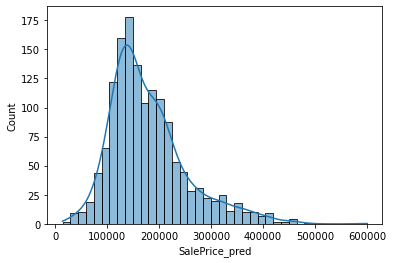

In [147]:
sns.histplot(data=df_final,x='SalePrice_pred',kde=True)

In [148]:
df_final.to_csv('Predictions_House_Price.csv',index=False)